# GTZAN Dataset - Music Genre Classification Analysis
## Deep Dive into Audio Features and Genre Characteristics

This notebook provides a comprehensive analysis of the GTZAN dataset, including:
- Feature extraction and statistical analysis
- Genre distribution and class balance
- Audio feature correlations and relationships
- Mel spectrogram visualization
- Deep exploratory data analysis (EDA)

## 1. Import Libraries and Setup

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec

# Audio processing
import librosa
import librosa.display

# Image processing
from PIL import Image

# File handling
import os
import glob

# Statistical analysis
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

# Set figure size defaults
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

# Create charts directory if it doesn't exist
os.makedirs('charts', exist_ok=True)

print("Libraries imported successfully!")
print(f"Python version: {os.sys.version}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
Python version: 3.10.12 (main, Nov 13 2024, 19:55:34) [Clang 16.0.0 (clang-1600.0.26.4)]
Pandas version: 2.1.4
NumPy version: 1.26.2


## 2. Load the Datasets

In [2]:
# Load the 30-second features dataset
df_30sec = pd.read_csv('Data/features_30_sec.csv')

# Load the 3-second features dataset
df_3sec = pd.read_csv('Data/features_3_sec.csv')

print("=" * 80)
print("DATASET OVERVIEW")
print("=" * 80)
print(f"\n30-second dataset shape: {df_30sec.shape}")
print(f"3-second dataset shape: {df_3sec.shape}")
print(f"\nNumber of features: {df_30sec.shape[1] - 2}")
print(f"Number of samples (30-sec): {df_30sec.shape[0]}")
print(f"Number of samples (3-sec): {df_3sec.shape[0]}")
print(f"\nData augmentation factor: {df_3sec.shape[0] / df_30sec.shape[0]:.1f}x")

DATASET OVERVIEW

30-second dataset shape: (1000, 60)
3-second dataset shape: (9990, 60)

Number of features: 58
Number of samples (30-sec): 1000
Number of samples (3-sec): 9990

Data augmentation factor: 10.0x


In [3]:
# Display first few rows
print("\n" + "=" * 80)
print("FIRST 5 ROWS OF 30-SECOND DATASET")
print("=" * 80)
df_30sec.head()


FIRST 5 ROWS OF 30-SECOND DATASET


filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

In [4]:
# Data info
print("\n" + "=" * 80)
print("DATASET INFORMATION")
print("=" * 80)
df_30sec.info()


DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harm

In [5]:
# Check for missing values
print("\n" + "=" * 80)
print("MISSING VALUES CHECK")
print("=" * 80)
missing_30 = df_30sec.isnull().sum()
missing_3 = df_3sec.isnull().sum()

print(f"\n30-second dataset: {missing_30.sum()} missing values")
print(f"3-second dataset: {missing_3.sum()} missing values")

if missing_30.sum() > 0:
    print("\nColumns with missing values (30-sec):")
    print(missing_30[missing_30 > 0])


MISSING VALUES CHECK

30-second dataset: 0 missing values
3-second dataset: 0 missing values


In [6]:
# Statistical summary
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY")
print("=" * 80)
df_30sec.describe()


STATISTICAL SUMMARY


length  chroma_stft_mean  chroma_stft_var     rms_mean  \
count    1000.000000       1000.000000      1000.000000  1000.000000   
mean   662030.846000          0.378682         0.086340     0.130930   
std      1784.073992          0.081705         0.007735     0.065683   
min    660000.000000          0.171939         0.044555     0.005276   
25%    661504.000000          0.319562         0.082298     0.086657   
50%    661794.000000          0.383148         0.086615     0.122443   
75%    661794.000000          0.435942         0.091256     0.175682   
max    675808.000000          0.663685         0.108111     0.397973   

           rms_var  spectral_centroid_mean  spectral_centroid_var  \
count  1000.000000             1000.000000           1.000000e+03   
mean      0.003051             2201.780898           4.696916e+05   
std       0.003634              715.960600           4.008995e+05   
min       0.000004              570.040355           7.911251e+03   
25%       0.000942             1627.697311           1.843505e+05   
50%       0.001816             2209.263090           3.384862e+05   
75%       0.003577             2691.294667           6.121479e+05   
max       0.027679             4435.243901           3.036843e+06   

       spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  ...  \
count              1000.000000             1000.000000   1000.000000  ...   
mean               2242.541070           137079.155165   4571.549304  ...   
std                 526.316473            96455.666326   1574.791602  ...   
min                 898.066208            10787.185064    749.140636  ...   
25%                1907.240605            67376.554428   3380.069642  ...   
50%                2221.392843           111977.548036   4658.524473  ...   
75%                2578.469836           182371.576801   5533.810460  ...   
max                3509.646417           694784.811549   8677.672688  ...   

       mfcc16_mean   mfcc16_var  mfcc17_mean   mfcc17_var  mfcc18_mean  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean      1.148144    60.730958    -3.966028    62.633624     0.507696   
std       4.578948    33.781951     4.549697    33.479172     3.869105   
min     -15.693844     9.169314   -17.234728    13.931521   -11.963694   
25%      -1.863280    40.376442    -7.207225    40.830875    -2.007015   
50%       1.212809    52.325077    -4.065605    54.717674     0.669643   
75%       4.359662    71.691755    -0.838737    75.040838     3.119212   
max      13.457150   392.932373    11.482946   406.058868    15.388390   

        mfcc18_var  mfcc19_mean   mfcc19_var  mfcc20_mean   mfcc20_var  
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000  
mean     63.712586    -2.328761    66.231930    -1.095348    70.126096  
std      34.401977     3.755957    37.174631     3.837007    45.228512  
min      15.420555   -18.501955    13.487622   -19.929634     7.956583  
25%      41.884240    -4.662925    41.710184    -3.368996    42.372865  
50%      54.804890    -2.393862    57.423059    -1.166289    59.186117  
75%      75.385832     0.150573    78.626444     1.312615    85.375374  
max     332.905426    14.694924   393.161987    15.369627   506.065155  

[8 rows x 58 columns]

## 3. Genre Distribution Analysis

In [7]:
# Count samples per genre
genre_counts_30 = df_30sec['label'].value_counts()
genre_counts_3 = df_3sec['label'].value_counts()

print("=" * 80)
print("GENRE DISTRIBUTION")
print("=" * 80)
print("\n30-second dataset:")
print(genre_counts_30)
print(f"\nTotal genres: {len(genre_counts_30)}")
print(f"Samples per genre: {genre_counts_30.values}")
print(f"Class balance: {'Balanced' if genre_counts_30.std() == 0 else 'Imbalanced'}")

GENRE DISTRIBUTION

30-second dataset:
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64

Total genres: 10
Samples per genre: [100 100 100 100 100 100 100 100 100 100]
Class balance: Balanced


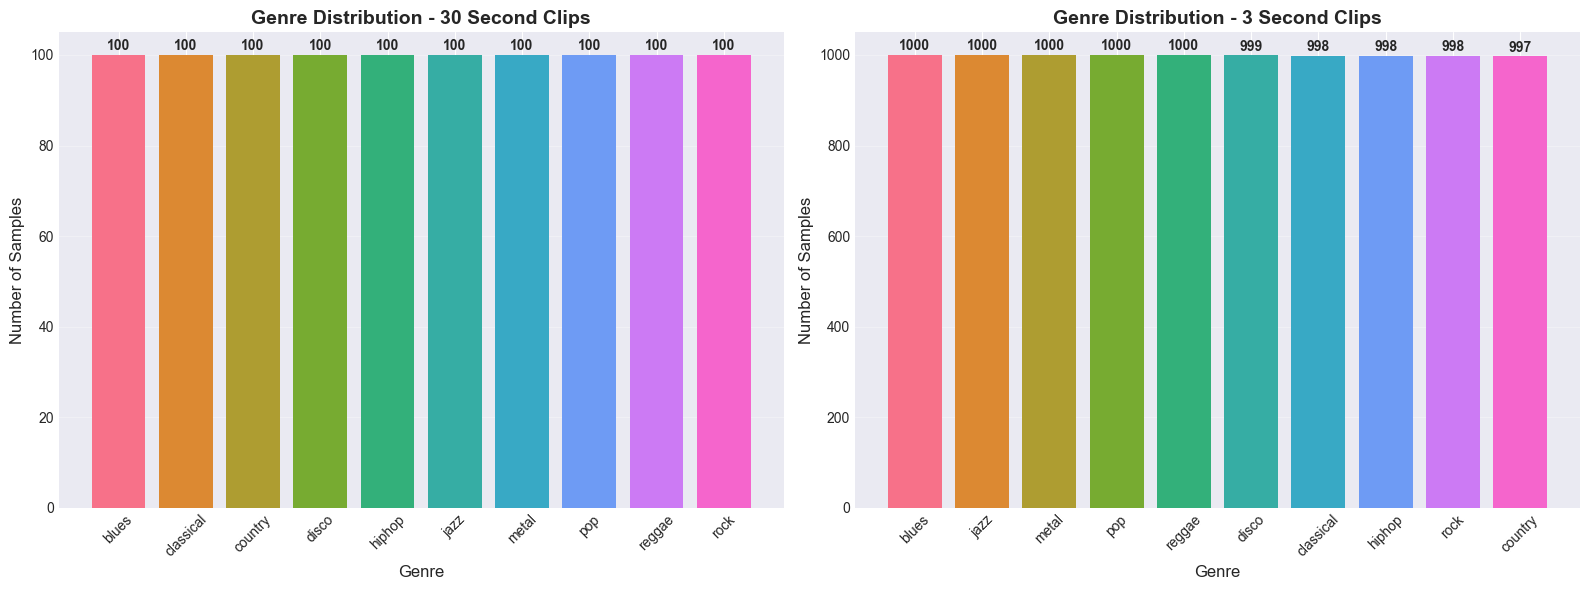

Chart saved: charts/01_genre_distribution.png


In [8]:
# Visualize genre distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 30-second dataset
axes[0].bar(genre_counts_30.index, genre_counts_30.values, color=sns.color_palette('husl', len(genre_counts_30)))
axes[0].set_title('Genre Distribution - 30 Second Clips', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Number of Samples', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(genre_counts_30.values):
    axes[0].text(i, v + 1, str(v), ha='center', fontweight='bold')

# 3-second dataset
axes[1].bar(genre_counts_3.index, genre_counts_3.values, color=sns.color_palette('husl', len(genre_counts_3)))
axes[1].set_title('Genre Distribution - 3 Second Clips', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Number of Samples', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(genre_counts_3.values):
    axes[1].text(i, v + 10, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('charts/01_genre_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/01_genre_distribution.png")

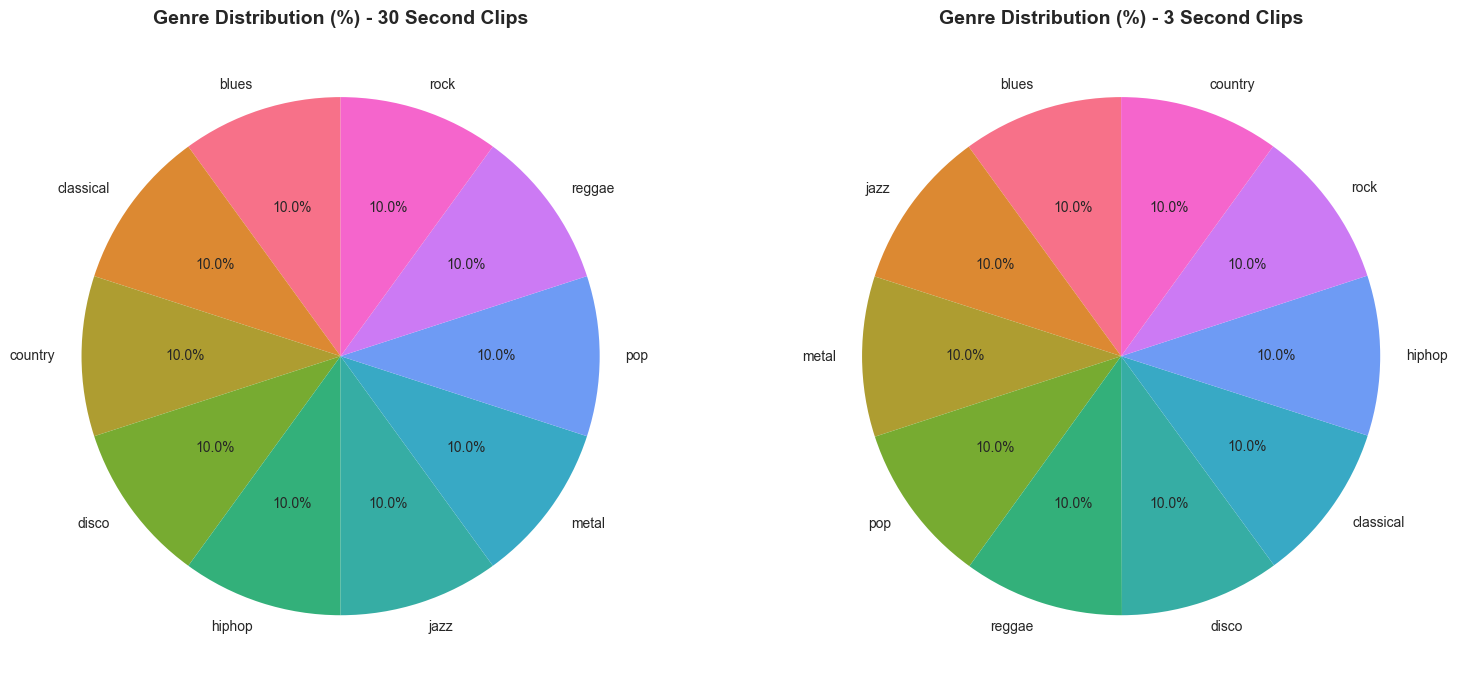

Chart saved: charts/02_genre_distribution_pie.png


In [9]:
# Pie chart for genre distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

colors = sns.color_palette('husl', len(genre_counts_30))

# 30-second dataset pie chart
axes[0].pie(genre_counts_30.values, labels=genre_counts_30.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[0].set_title('Genre Distribution (%) - 30 Second Clips', fontsize=14, fontweight='bold')

# 3-second dataset pie chart
axes[1].pie(genre_counts_3.values, labels=genre_counts_3.index, autopct='%1.1f%%',
            colors=colors, startangle=90)
axes[1].set_title('Genre Distribution (%) - 3 Second Clips', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('charts/02_genre_distribution_pie.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/02_genre_distribution_pie.png")

## 4. Feature Analysis

In [10]:
# Identify feature columns
feature_cols = [col for col in df_30sec.columns if col not in ['filename', 'length', 'label']]

print("=" * 80)
print("FEATURE ANALYSIS")
print("=" * 80)
print(f"\nTotal number of features: {len(feature_cols)}")
print("\nFeature categories:")

# Group features by category
feature_categories = {
    'Chroma': [col for col in feature_cols if 'chroma' in col],
    'RMS': [col for col in feature_cols if 'rms' in col],
    'Spectral Centroid': [col for col in feature_cols if 'spectral_centroid' in col],
    'Spectral Bandwidth': [col for col in feature_cols if 'spectral_bandwidth' in col],
    'Rolloff': [col for col in feature_cols if 'rolloff' in col],
    'Zero Crossing Rate': [col for col in feature_cols if 'zero_crossing' in col],
    'Harmony': [col for col in feature_cols if 'harmony' in col],
    'Perceptr': [col for col in feature_cols if 'perceptr' in col],
    'Tempo': [col for col in feature_cols if 'tempo' in col],
    'MFCC': [col for col in feature_cols if 'mfcc' in col]
}

for category, features in feature_categories.items():
    print(f"  - {category}: {len(features)} features")

FEATURE ANALYSIS

Total number of features: 57

Feature categories:
  - Chroma: 2 features
  - RMS: 2 features
  - Spectral Centroid: 2 features
  - Spectral Bandwidth: 2 features
  - Rolloff: 2 features
  - Zero Crossing Rate: 2 features
  - Harmony: 2 features
  - Perceptr: 2 features
  - Tempo: 1 features
  - MFCC: 40 features


### 4.1 Feature Distribution by Genre

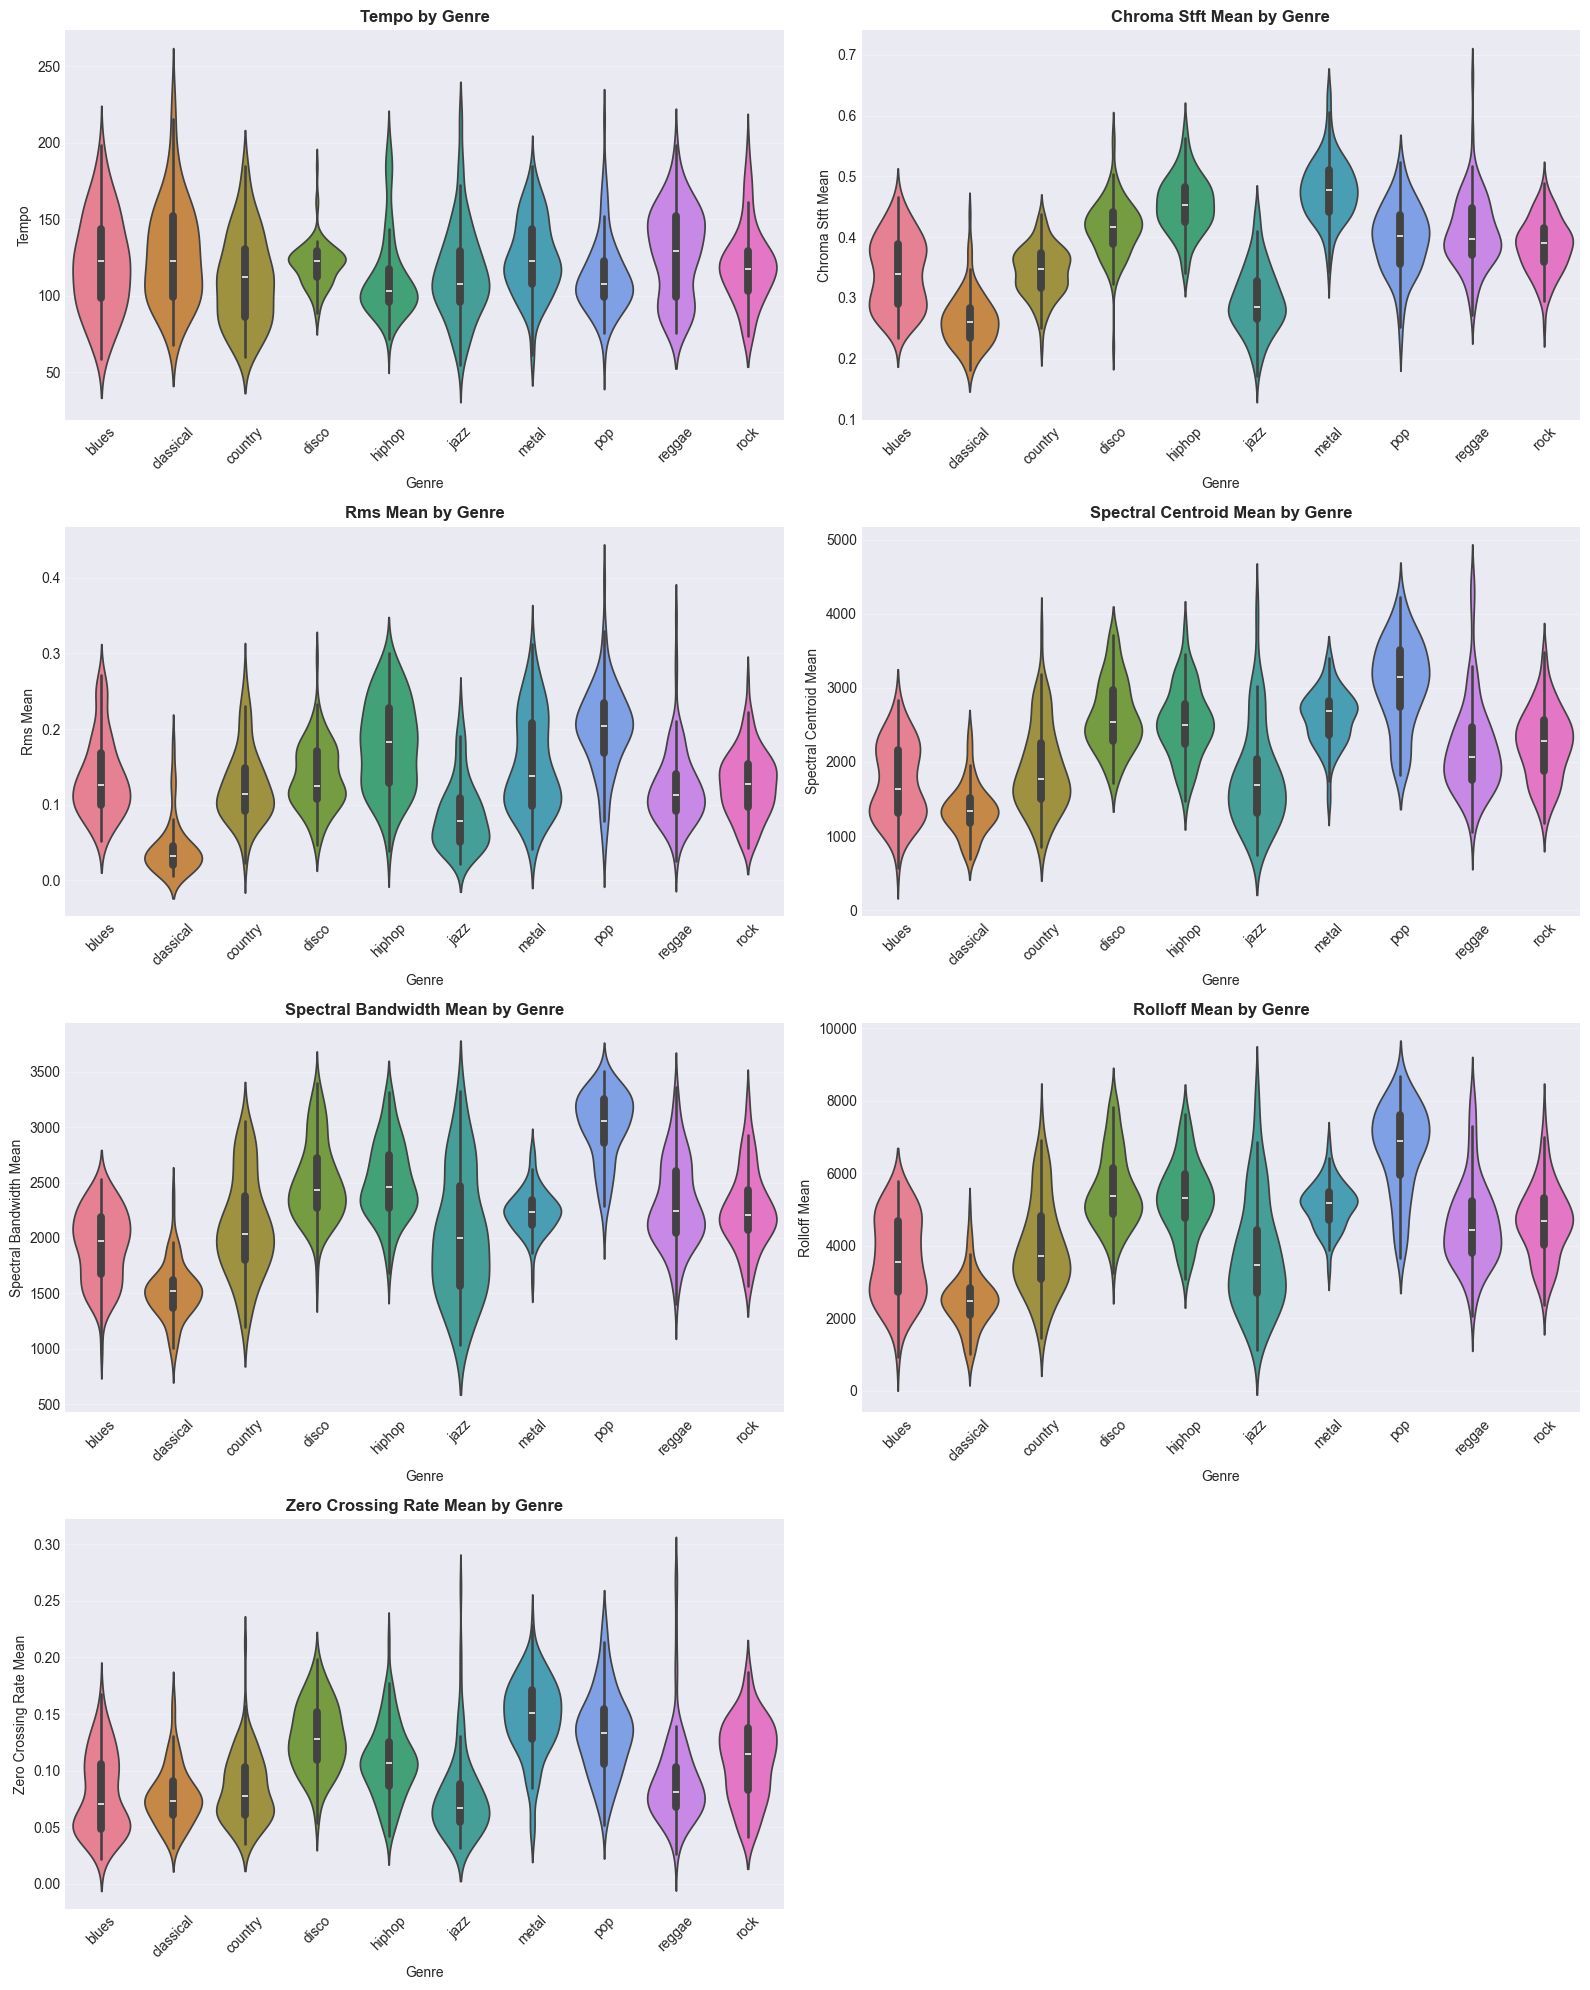

Chart saved: charts/03_feature_distributions_by_genre.png


In [11]:
# Select key features for visualization
key_features = ['tempo', 'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean', 
                'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean']

# Create violin plots for key features
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.violinplot(data=df_30sec, x='label', y=feature, ax=axes[idx], palette='husl')
    axes[idx].set_title(f'{feature.replace("_", " ").title()} by Genre', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Genre', fontsize=10)
    axes[idx].set_ylabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('charts/03_feature_distributions_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/03_feature_distributions_by_genre.png")

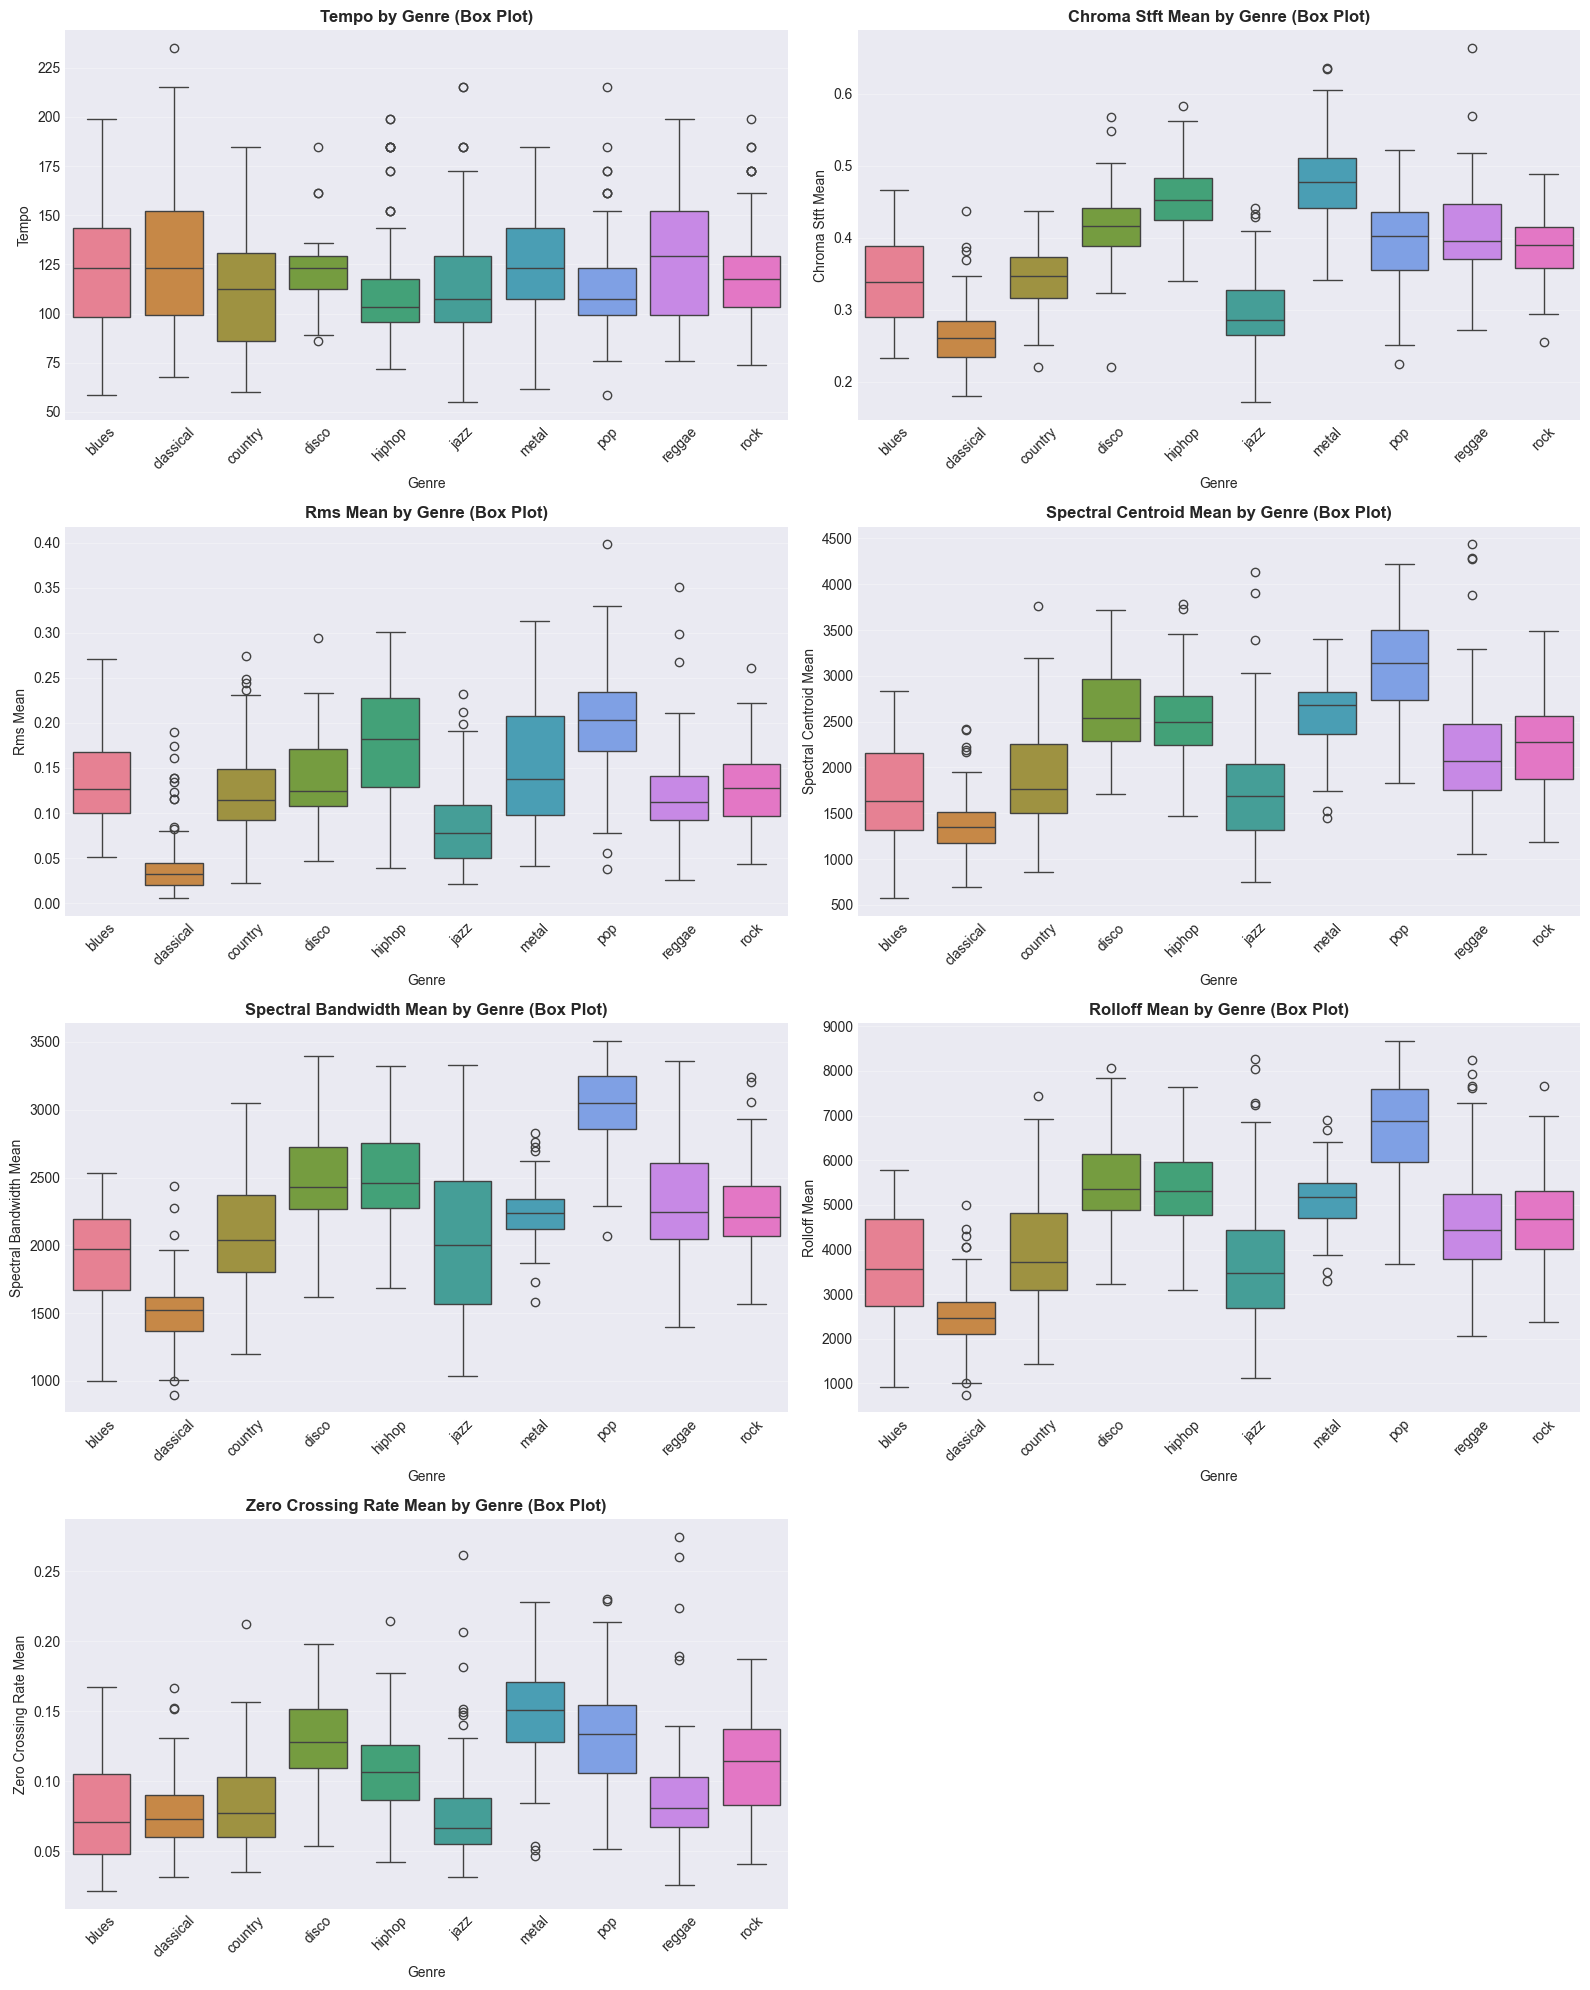

Chart saved: charts/04_feature_boxplots_by_genre.png


In [12]:
# Box plots for key features
fig, axes = plt.subplots(4, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, feature in enumerate(key_features):
    sns.boxplot(data=df_30sec, x='label', y=feature, ax=axes[idx], palette='husl')
    axes[idx].set_title(f'{feature.replace("_", " ").title()} by Genre (Box Plot)', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Genre', fontsize=10)
    axes[idx].set_ylabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[7])

plt.tight_layout()
plt.savefig('charts/04_feature_boxplots_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/04_feature_boxplots_by_genre.png")

### 4.2 MFCC Analysis

In [13]:
# Analyze MFCC features
mfcc_mean_cols = [col for col in df_30sec.columns if 'mfcc' in col and 'mean' in col]
mfcc_var_cols = [col for col in df_30sec.columns if 'mfcc' in col and 'var' in col]

print(f"Number of MFCC coefficients: {len(mfcc_mean_cols)}")
print(f"Total MFCC features (mean + variance): {len(mfcc_mean_cols) + len(mfcc_var_cols)}")

Number of MFCC coefficients: 20
Total MFCC features (mean + variance): 40


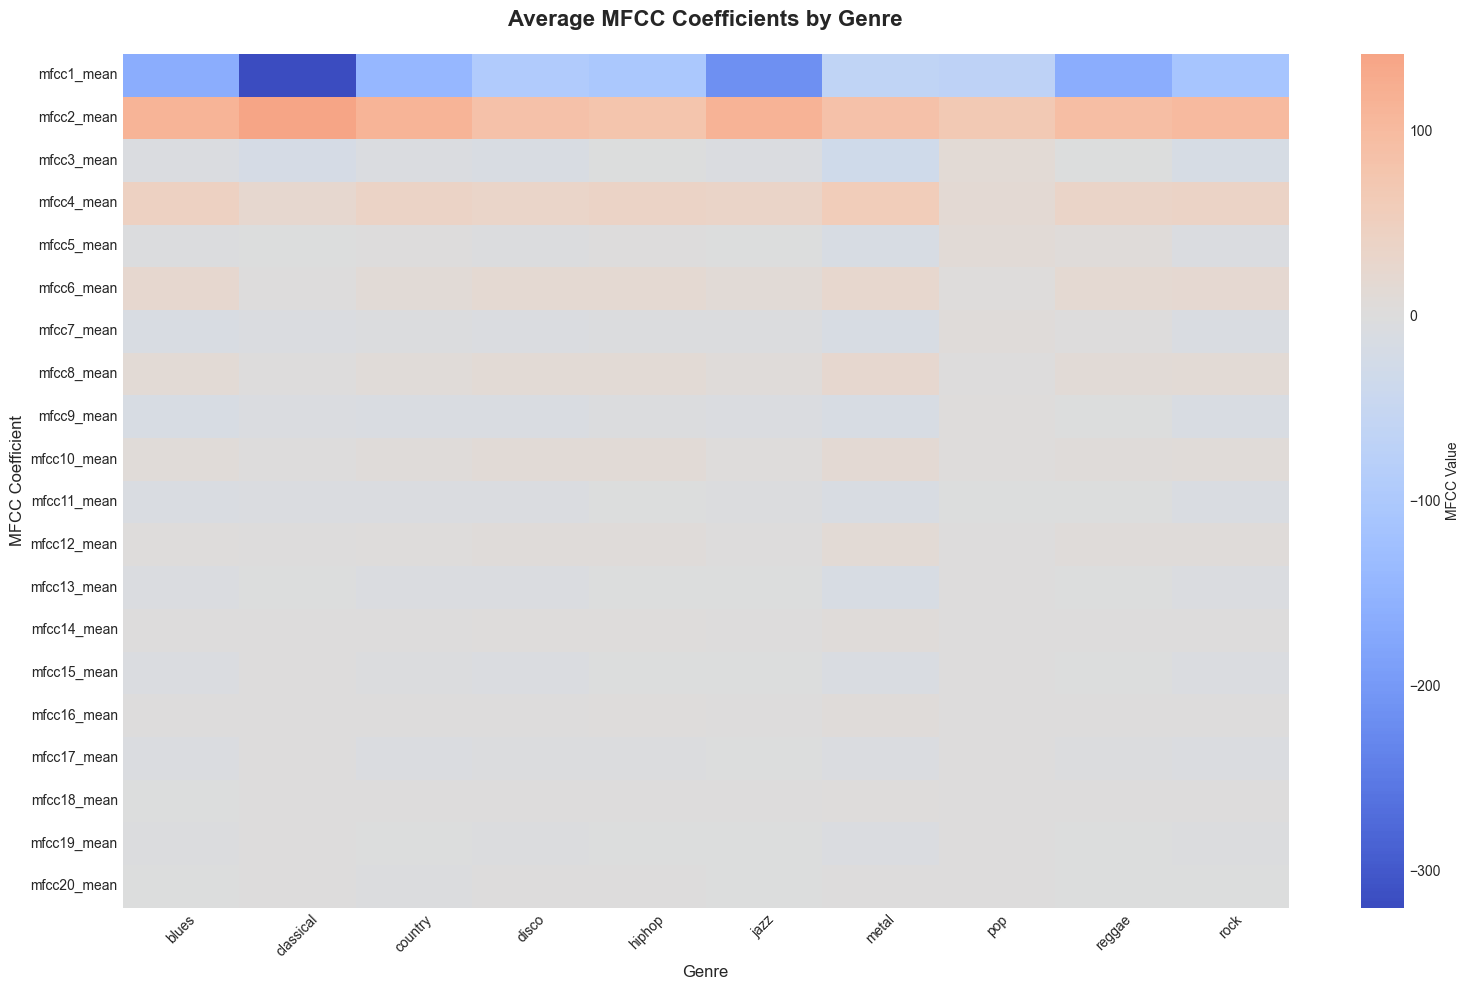

Chart saved: charts/05_mfcc_heatmap_by_genre.png


In [14]:
# Average MFCC values per genre
mfcc_genre_means = df_30sec.groupby('label')[mfcc_mean_cols].mean()

# Heatmap of MFCC means by genre
plt.figure(figsize=(16, 10))
sns.heatmap(mfcc_genre_means.T, cmap='coolwarm', center=0, annot=False, fmt='.1f',
            cbar_kws={'label': 'MFCC Value'})
plt.title('Average MFCC Coefficients by Genre', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('MFCC Coefficient', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('charts/05_mfcc_heatmap_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/05_mfcc_heatmap_by_genre.png")

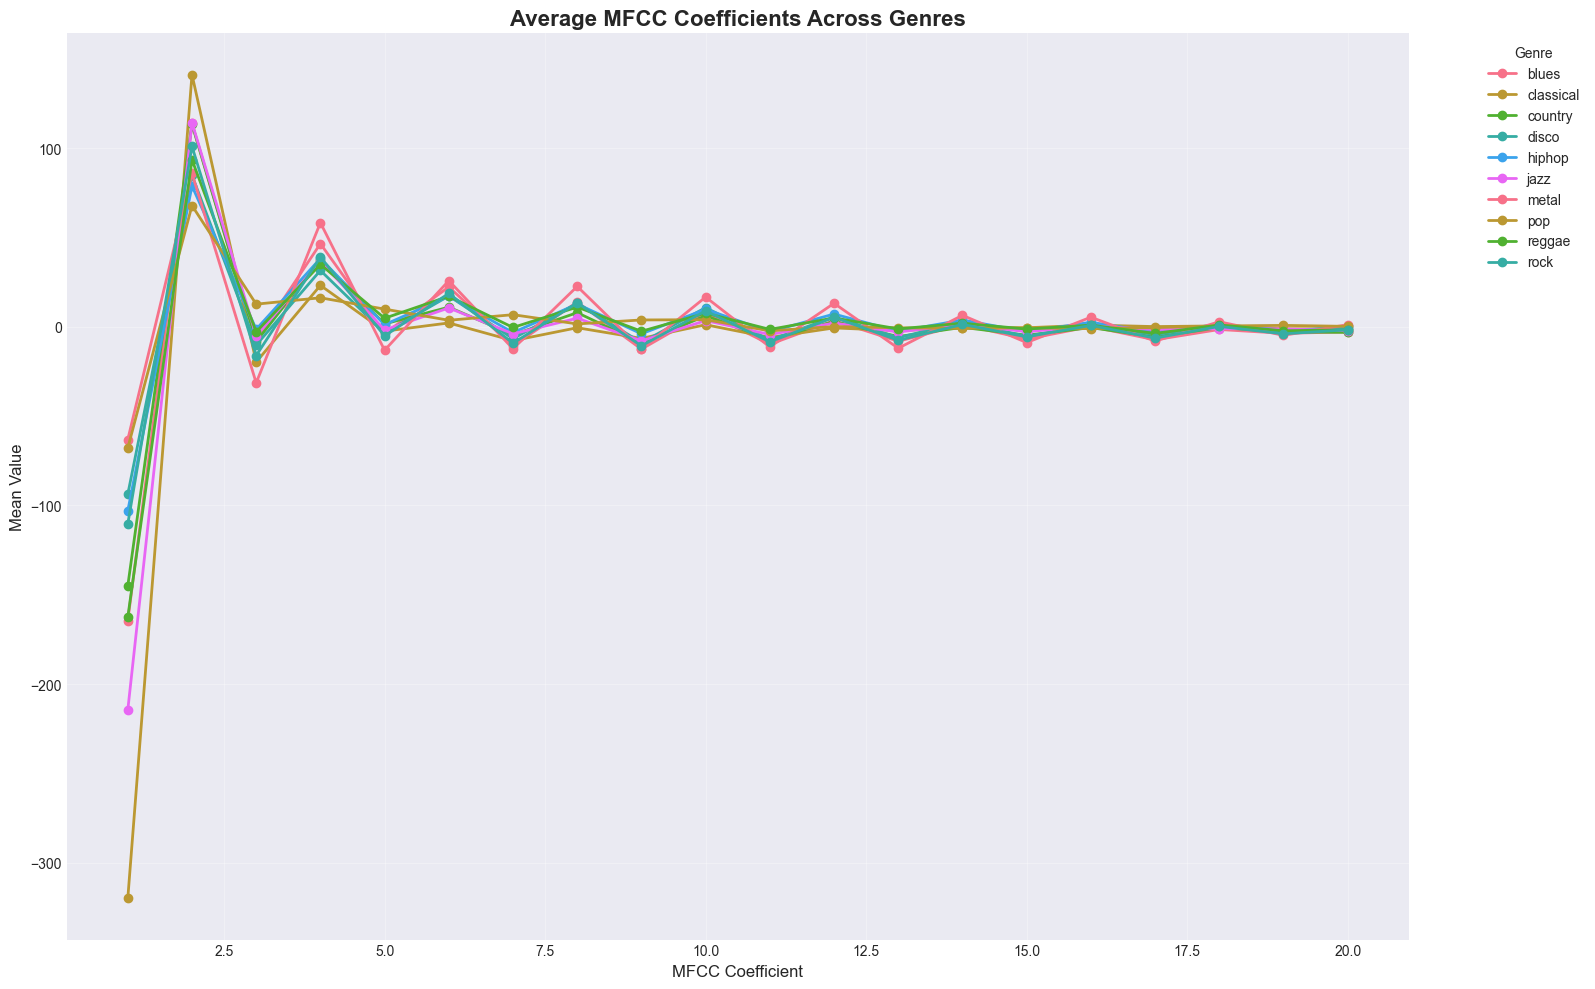

Chart saved: charts/06_mfcc_line_plot.png


In [15]:
# MFCC line plots for each genre
plt.figure(figsize=(16, 10))

for genre in df_30sec['label'].unique():
    genre_data = df_30sec[df_30sec['label'] == genre][mfcc_mean_cols].mean()
    plt.plot(range(1, len(mfcc_mean_cols) + 1), genre_data.values, marker='o', label=genre, linewidth=2)

plt.title('Average MFCC Coefficients Across Genres', fontsize=16, fontweight='bold')
plt.xlabel('MFCC Coefficient', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('charts/06_mfcc_line_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/06_mfcc_line_plot.png")

## 5. Correlation Analysis

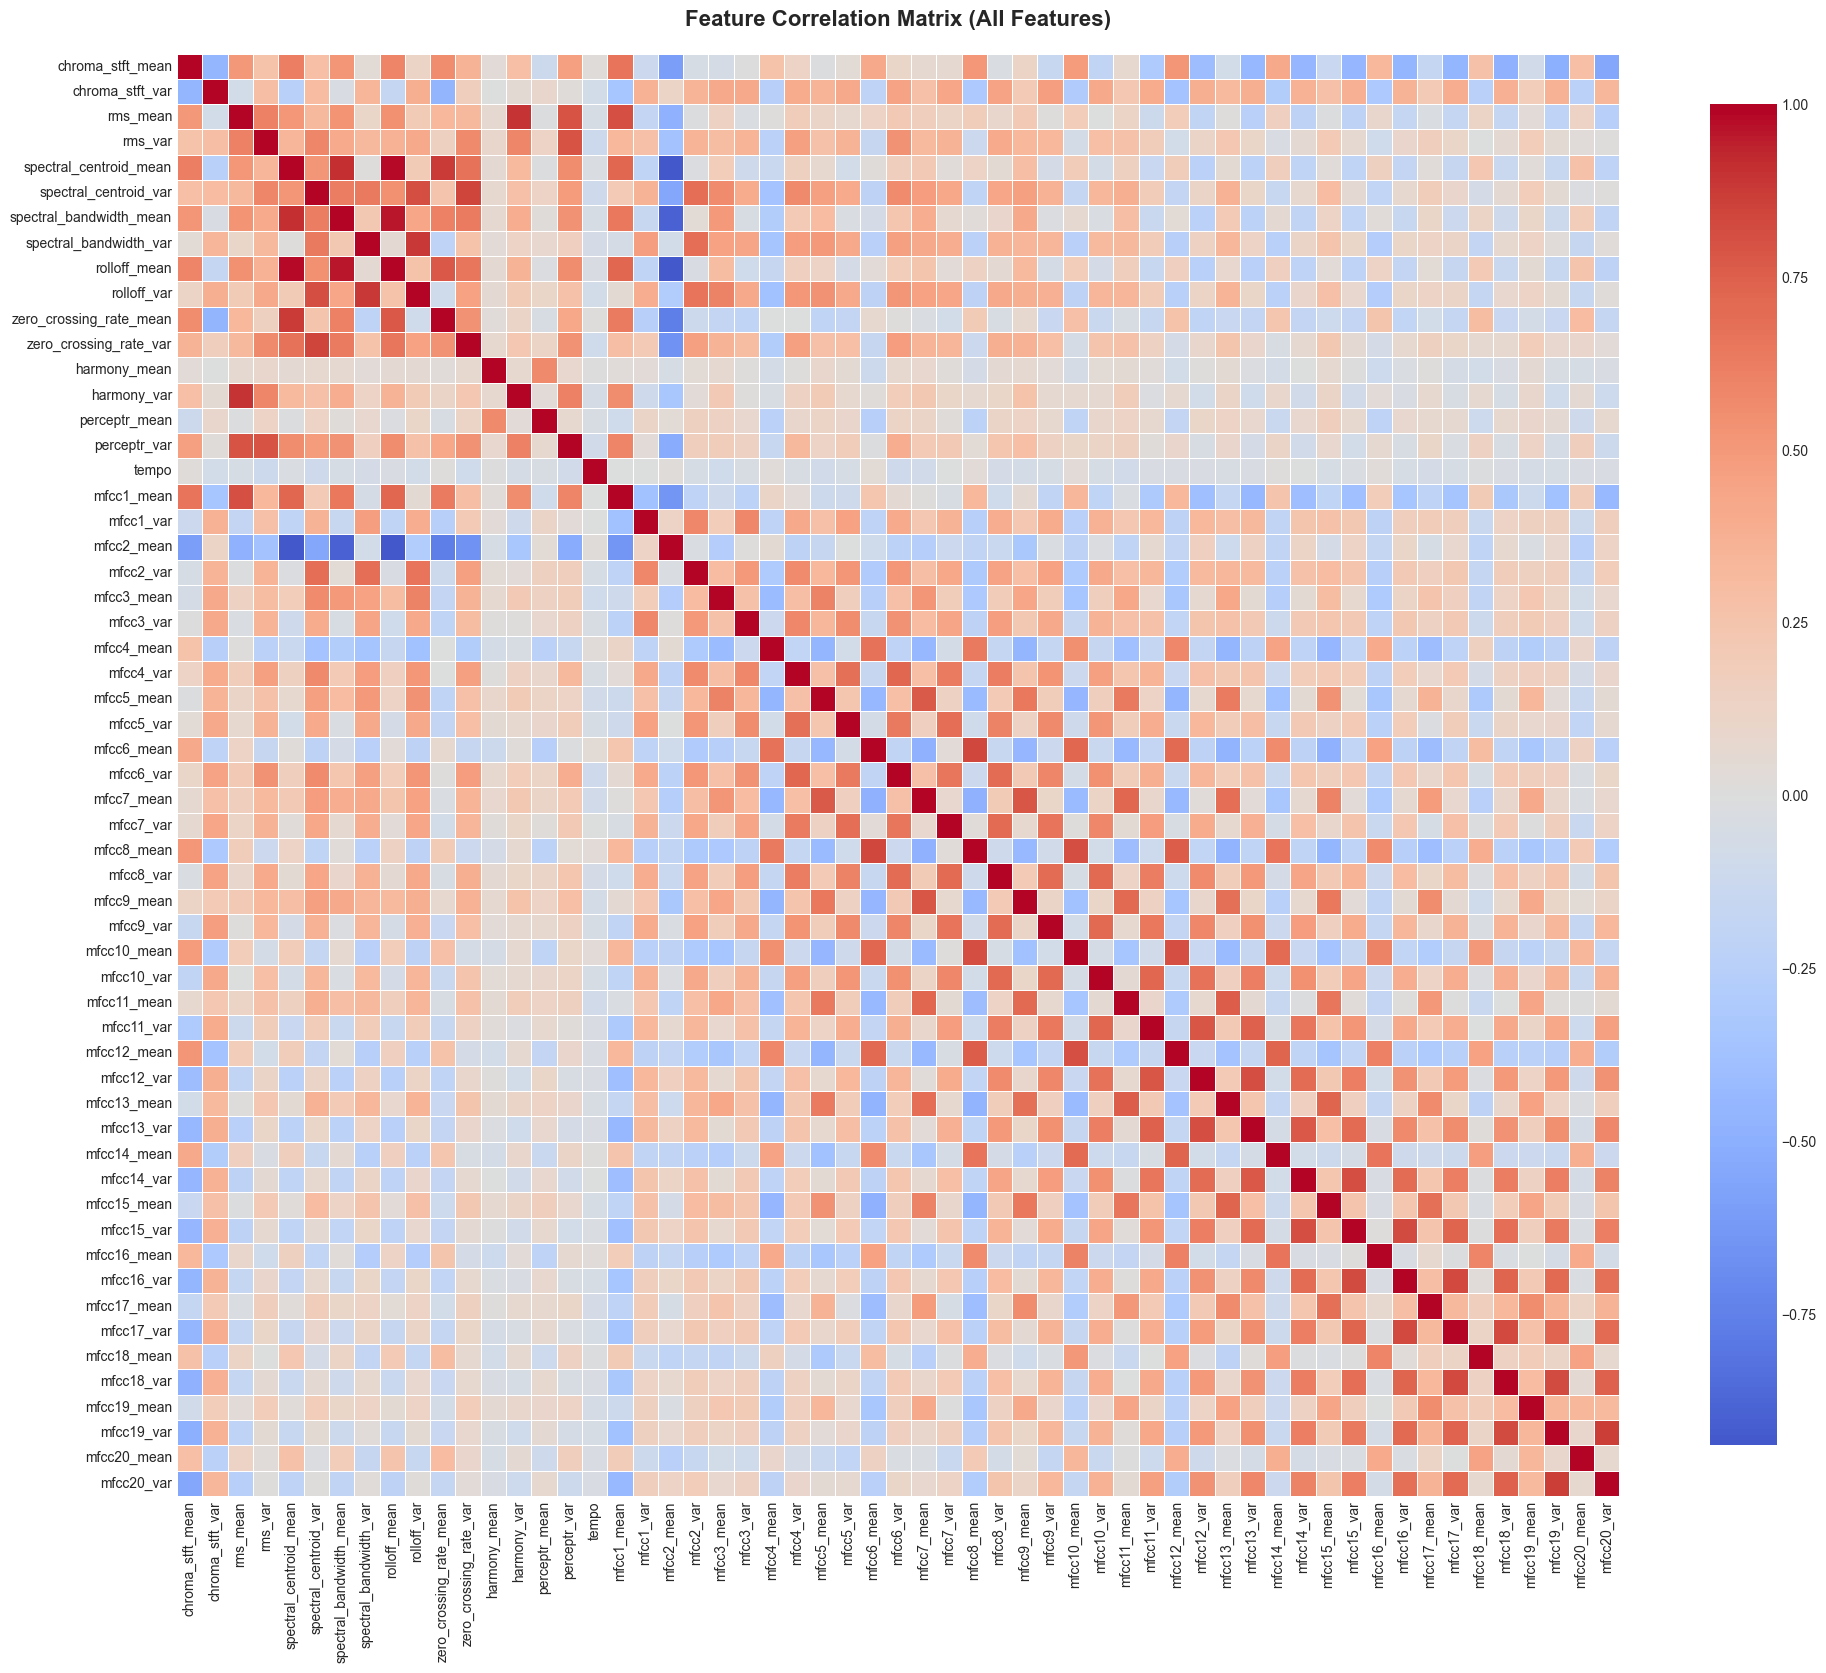

Chart saved: charts/07_correlation_matrix_full.png


In [16]:
# Compute correlation matrix for all features
correlation_matrix = df_30sec[feature_cols].corr()

# Full correlation heatmap
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (All Features)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('charts/07_correlation_matrix_full.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/07_correlation_matrix_full.png")

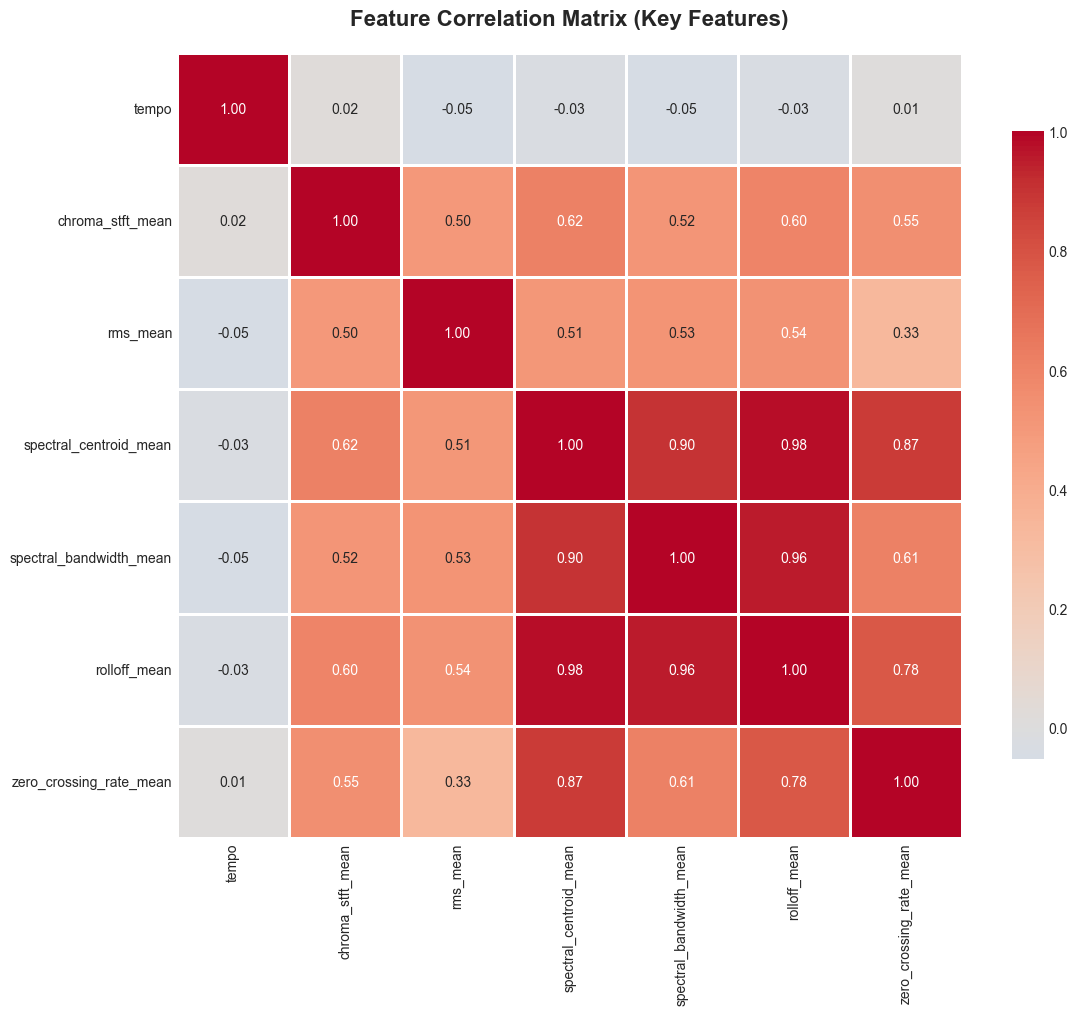

Chart saved: charts/08_correlation_matrix_key_features.png


In [17]:
# Correlation matrix for key features only
key_corr_matrix = df_30sec[key_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(key_corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix (Key Features)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('charts/08_correlation_matrix_key_features.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/08_correlation_matrix_key_features.png")

In [18]:
# Find highly correlated feature pairs
# Get upper triangle of correlation matrix
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Find features with correlation > 0.8
high_corr_pairs = [(column, row, upper_tri.loc[row, column]) 
                   for column in upper_tri.columns 
                   for row in upper_tri.index 
                   if abs(upper_tri.loc[row, column]) > 0.8]

print("\n" + "=" * 80)
print("HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.8)")
print("=" * 80)
if high_corr_pairs:
    for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True)[:20]:
        print(f"{feat1} <-> {feat2}: {corr:.3f}")
else:
    print("No highly correlated pairs found.")


HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.8)
rolloff_mean <-> spectral_centroid_mean: 0.980
rolloff_mean <-> spectral_bandwidth_mean: 0.956
mfcc2_mean <-> spectral_centroid_mean: -0.940
mfcc2_mean <-> rolloff_mean: -0.934
spectral_bandwidth_mean <-> spectral_centroid_mean: 0.904
mfcc2_mean <-> spectral_bandwidth_mean: -0.897
harmony_var <-> rms_mean: 0.894
rolloff_var <-> spectral_bandwidth_var: 0.885
zero_crossing_rate_mean <-> spectral_centroid_mean: 0.875
mfcc20_var <-> mfcc19_var: 0.869
zero_crossing_rate_var <-> spectral_centroid_var: 0.844
mfcc8_mean <-> mfcc6_mean: 0.837
mfcc18_var <-> mfcc17_var: 0.833
mfcc17_var <-> mfcc16_var: 0.827
mfcc19_var <-> mfcc18_var: 0.821
mfcc16_var <-> mfcc15_var: 0.821
rolloff_var <-> spectral_centroid_var: 0.816
mfcc13_var <-> mfcc12_var: 0.812
mfcc10_mean <-> mfcc8_mean: 0.812
mfcc15_var <-> mfcc14_var: 0.811


## 6. Tempo Analysis

In [19]:
# Tempo statistics by genre
tempo_stats = df_30sec.groupby('label')['tempo'].agg(['mean', 'std', 'min', 'max'])
tempo_stats = tempo_stats.sort_values('mean', ascending=False)

print("=" * 80)
print("TEMPO STATISTICS BY GENRE")
print("=" * 80)
print(tempo_stats.round(2))

TEMPO STATISTICS BY GENRE
             mean    std    min     max
label                                  
reggae     129.28  29.43  76.00  198.77
classical  127.92  33.70  68.00  234.91
metal      124.87  25.12  61.52  184.57
blues      120.74  31.79  58.73  198.77
disco      120.34  14.22  86.13  184.57
rock       120.26  25.24  73.83  198.77
jazz       115.07  30.65  54.98  215.33
hiphop     112.95  27.73  71.78  198.77
pop        112.76  24.64  58.73  215.33
country    110.86  29.64  60.09  184.57


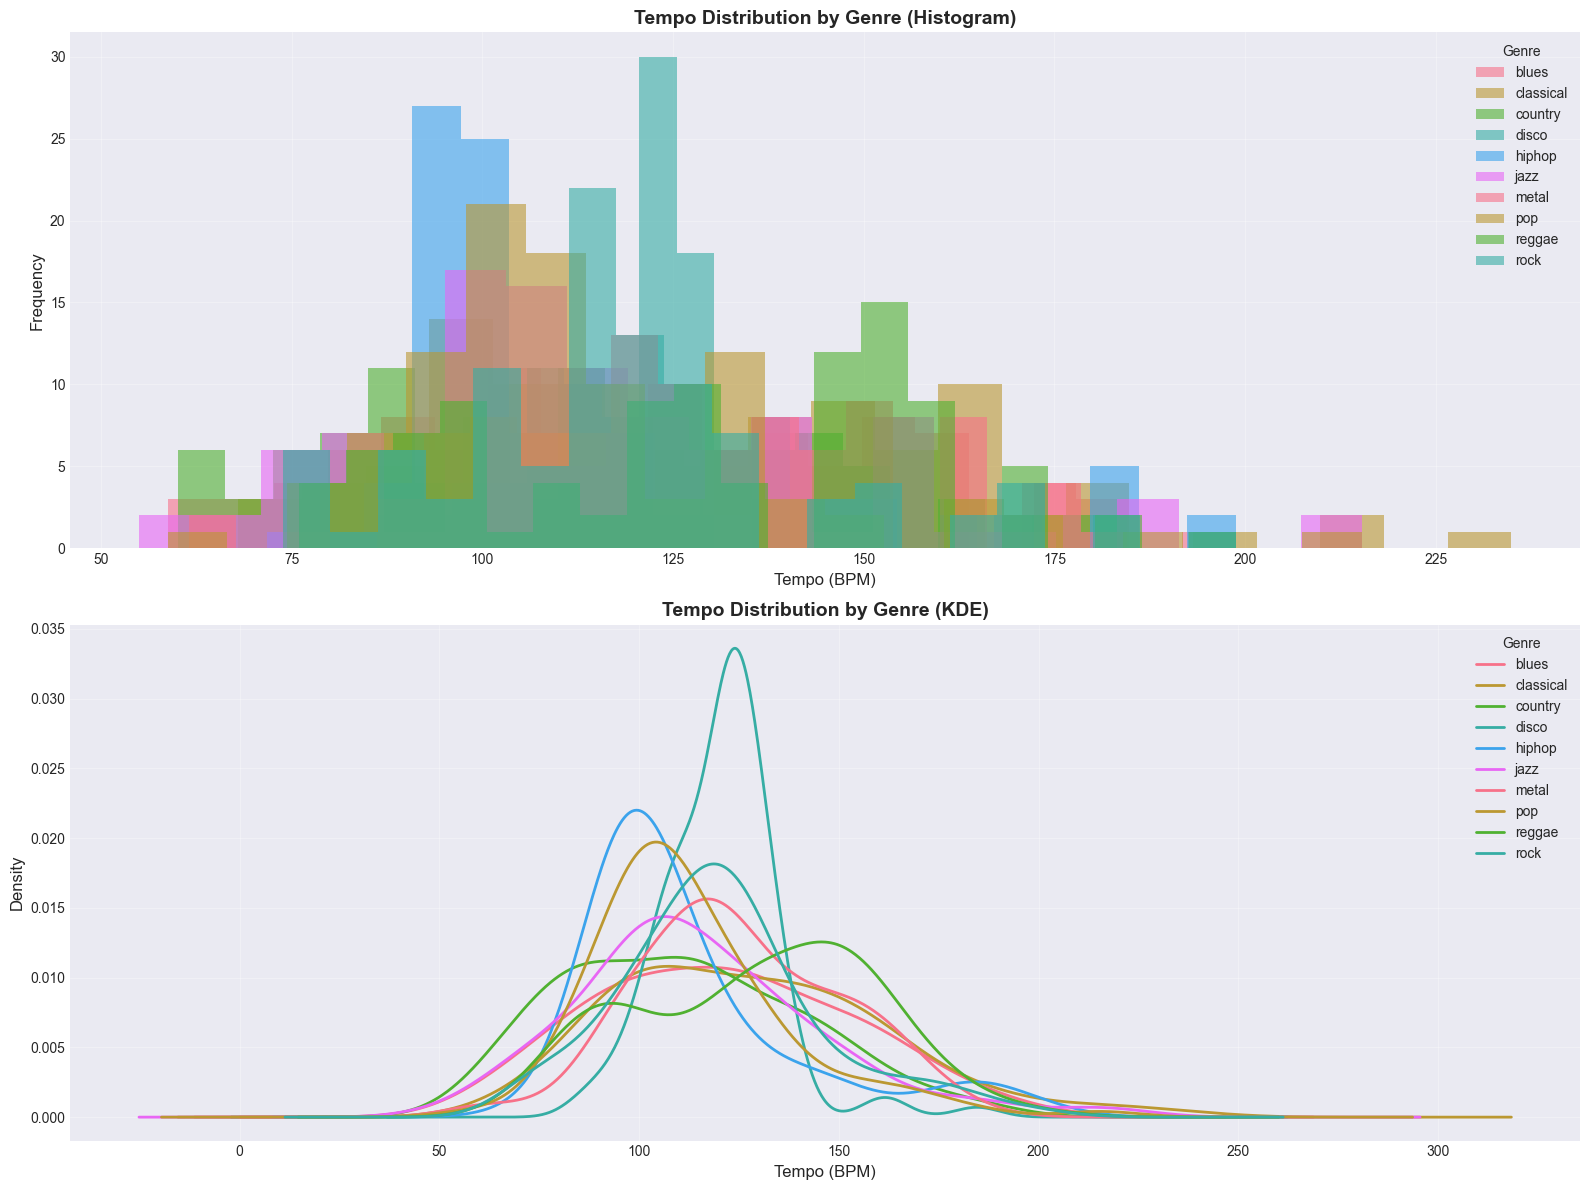

Chart saved: charts/09_tempo_distribution.png


In [20]:
# Tempo distribution by genre
fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# Histogram
for genre in df_30sec['label'].unique():
    genre_tempo = df_30sec[df_30sec['label'] == genre]['tempo']
    axes[0].hist(genre_tempo, alpha=0.6, label=genre, bins=20)

axes[0].set_title('Tempo Distribution by Genre (Histogram)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tempo (BPM)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].legend(title='Genre', loc='upper right')
axes[0].grid(True, alpha=0.3)

# KDE plot
for genre in df_30sec['label'].unique():
    genre_tempo = df_30sec[df_30sec['label'] == genre]['tempo']
    genre_tempo.plot(kind='kde', ax=axes[1], label=genre, linewidth=2)

axes[1].set_title('Tempo Distribution by Genre (KDE)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tempo (BPM)', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].legend(title='Genre', loc='upper right')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('charts/09_tempo_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/09_tempo_distribution.png")

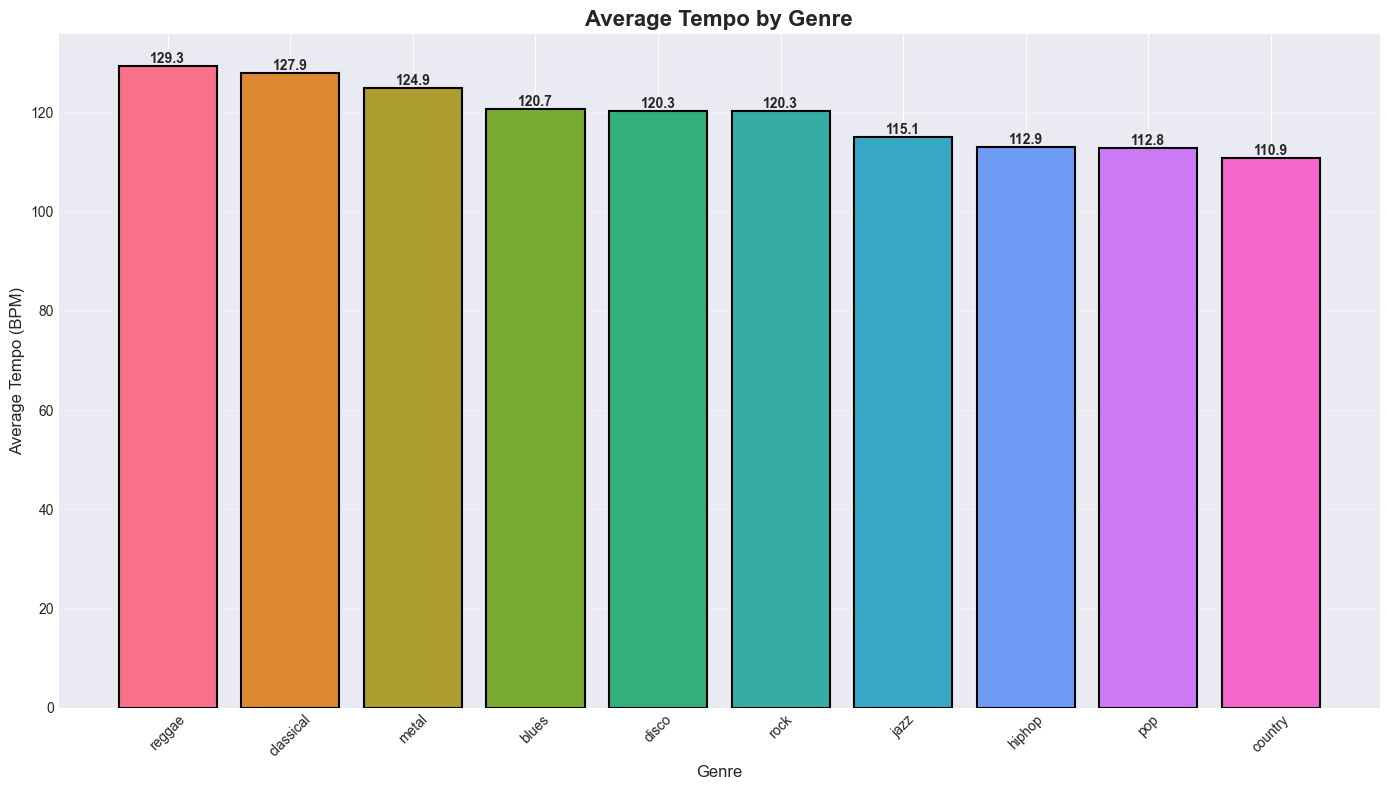

Chart saved: charts/10_average_tempo_by_genre.png


In [21]:
# Average tempo by genre - bar chart
plt.figure(figsize=(14, 8))
tempo_means = df_30sec.groupby('label')['tempo'].mean().sort_values(ascending=False)
colors = sns.color_palette('husl', len(tempo_means))

bars = plt.bar(tempo_means.index, tempo_means.values, color=colors, edgecolor='black', linewidth=1.5)
plt.title('Average Tempo by Genre', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Average Tempo (BPM)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.savefig('charts/10_average_tempo_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/10_average_tempo_by_genre.png")

## 7. Spectral Features Analysis

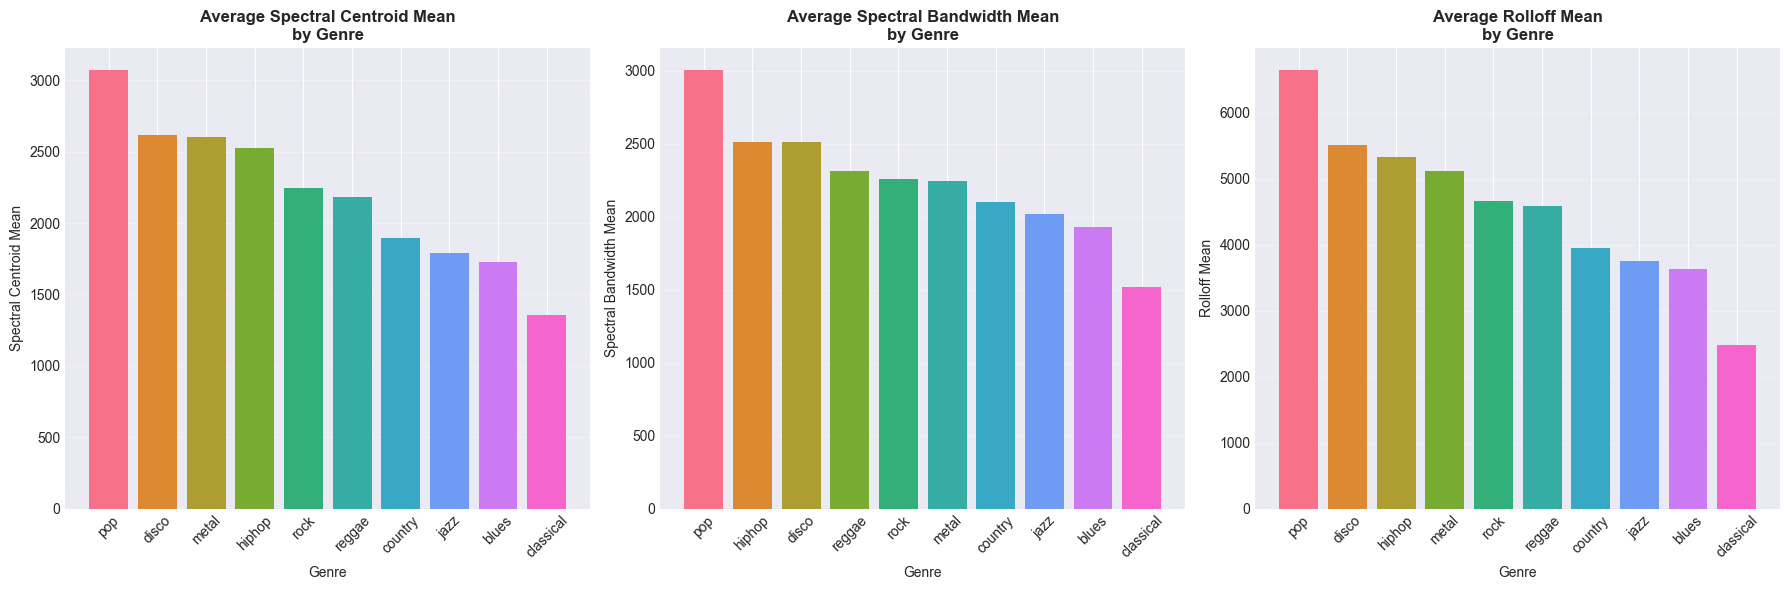

Chart saved: charts/11_spectral_features_comparison.png


In [22]:
# Spectral features comparison
spectral_features = ['spectral_centroid_mean', 'spectral_bandwidth_mean', 'rolloff_mean']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for idx, feature in enumerate(spectral_features):
    genre_means = df_30sec.groupby('label')[feature].mean().sort_values(ascending=False)
    axes[idx].bar(genre_means.index, genre_means.values, color=sns.color_palette('husl', len(genre_means)))
    axes[idx].set_title(f'Average {feature.replace("_", " ").title()}\nby Genre', 
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Genre', fontsize=10)
    axes[idx].set_ylabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('charts/11_spectral_features_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/11_spectral_features_comparison.png")

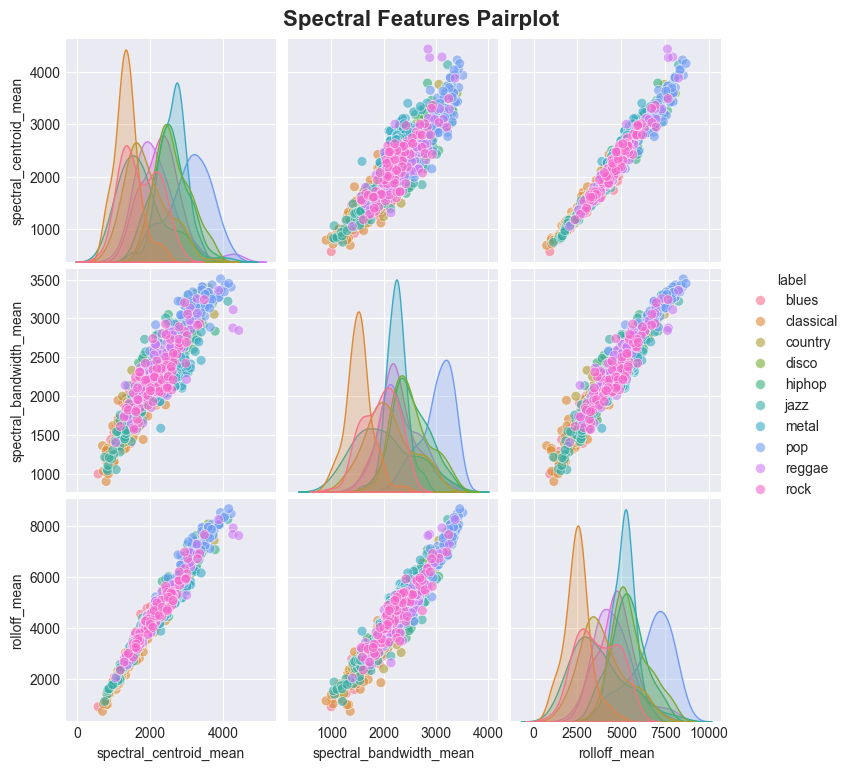

Chart saved: charts/12_spectral_features_pairplot.png


In [23]:
# Scatter plot matrix for spectral features
spectral_data = df_30sec[spectral_features + ['label']]

g = sns.pairplot(spectral_data, hue='label', palette='husl', 
                 diag_kind='kde', plot_kws={'alpha': 0.6, 's': 50})
g.fig.suptitle('Spectral Features Pairplot', y=1.02, fontsize=16, fontweight='bold')
plt.savefig('charts/12_spectral_features_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/12_spectral_features_pairplot.png")

## 8. RMS Energy and Zero Crossing Rate

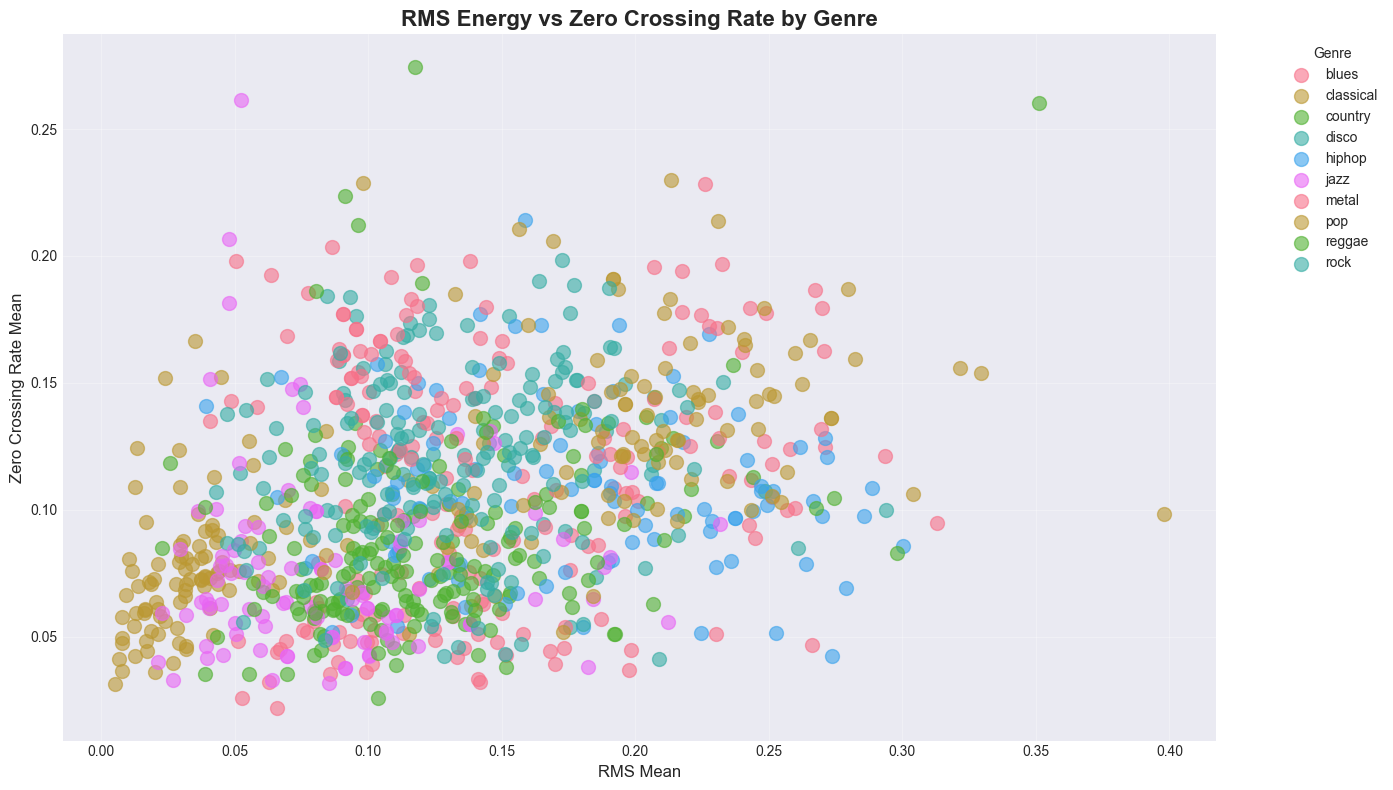

Chart saved: charts/13_rms_vs_zcr.png


In [24]:
# RMS vs Zero Crossing Rate by genre
plt.figure(figsize=(14, 8))

for genre in df_30sec['label'].unique():
    genre_data = df_30sec[df_30sec['label'] == genre]
    plt.scatter(genre_data['rms_mean'], genre_data['zero_crossing_rate_mean'], 
                label=genre, alpha=0.6, s=100)

plt.title('RMS Energy vs Zero Crossing Rate by Genre', fontsize=16, fontweight='bold')
plt.xlabel('RMS Mean', fontsize=12)
plt.ylabel('Zero Crossing Rate Mean', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('charts/13_rms_vs_zcr.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/13_rms_vs_zcr.png")

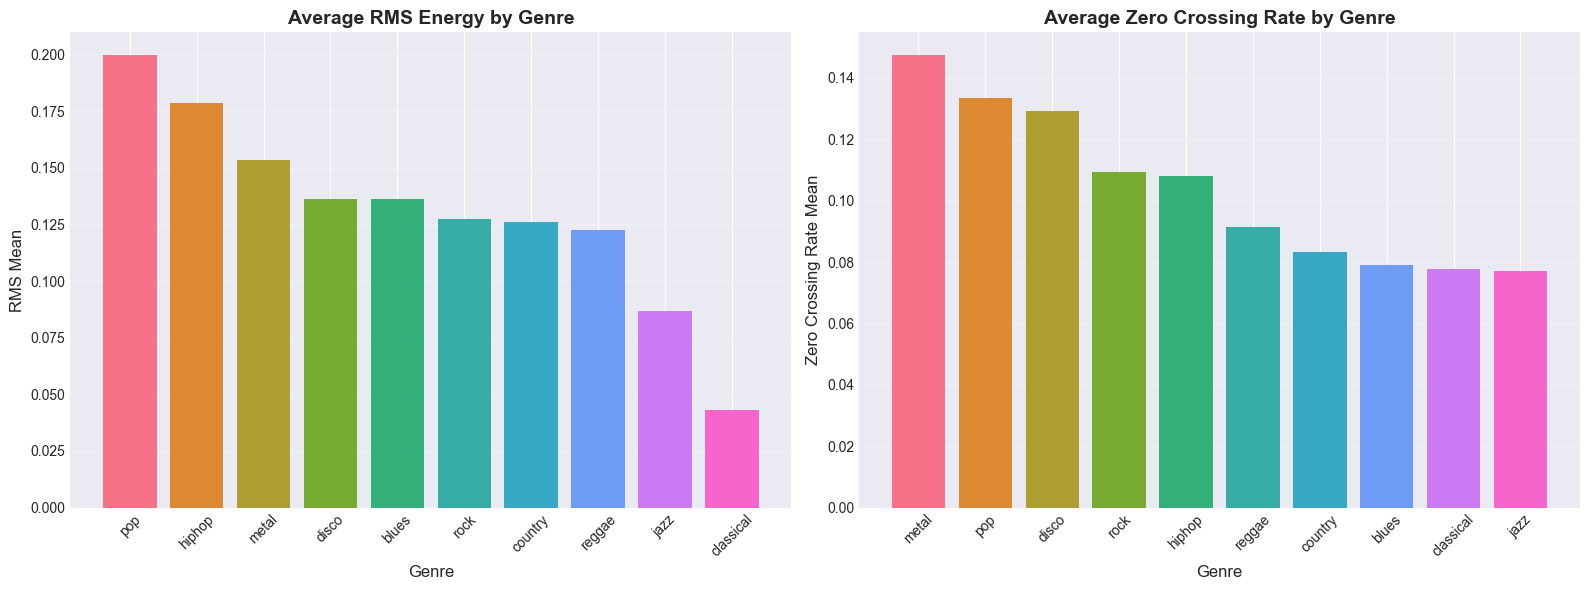

Chart saved: charts/14_rms_zcr_by_genre.png


In [25]:
# Average RMS and ZCR by genre
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMS
rms_means = df_30sec.groupby('label')['rms_mean'].mean().sort_values(ascending=False)
axes[0].bar(rms_means.index, rms_means.values, color=sns.color_palette('husl', len(rms_means)))
axes[0].set_title('Average RMS Energy by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('RMS Mean', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# ZCR
zcr_means = df_30sec.groupby('label')['zero_crossing_rate_mean'].mean().sort_values(ascending=False)
axes[1].bar(zcr_means.index, zcr_means.values, color=sns.color_palette('husl', len(zcr_means)))
axes[1].set_title('Average Zero Crossing Rate by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Zero Crossing Rate Mean', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('charts/14_rms_zcr_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/14_rms_zcr_by_genre.png")

## 9. Audio File Analysis

In [26]:
# List available audio files
audio_dir = 'Data/genres_original/'
genres = os.listdir(audio_dir)
genres = [g for g in genres if os.path.isdir(os.path.join(audio_dir, g))]

print("=" * 80)
print("AUDIO FILES OVERVIEW")
print("=" * 80)
print(f"\nGenres found: {genres}")

for genre in sorted(genres):
    genre_path = os.path.join(audio_dir, genre)
    audio_files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    print(f"  {genre}: {len(audio_files)} audio files")

AUDIO FILES OVERVIEW

Genres found: ['pop', 'metal', 'disco', 'blues', 'reggae', 'classical', 'rock', 'hiphop', 'country', 'jazz']
  blues: 100 audio files
  classical: 100 audio files
  country: 100 audio files
  disco: 100 audio files
  hiphop: 100 audio files
  jazz: 100 audio files
  metal: 100 audio files
  pop: 100 audio files
  reggae: 100 audio files
  rock: 100 audio files


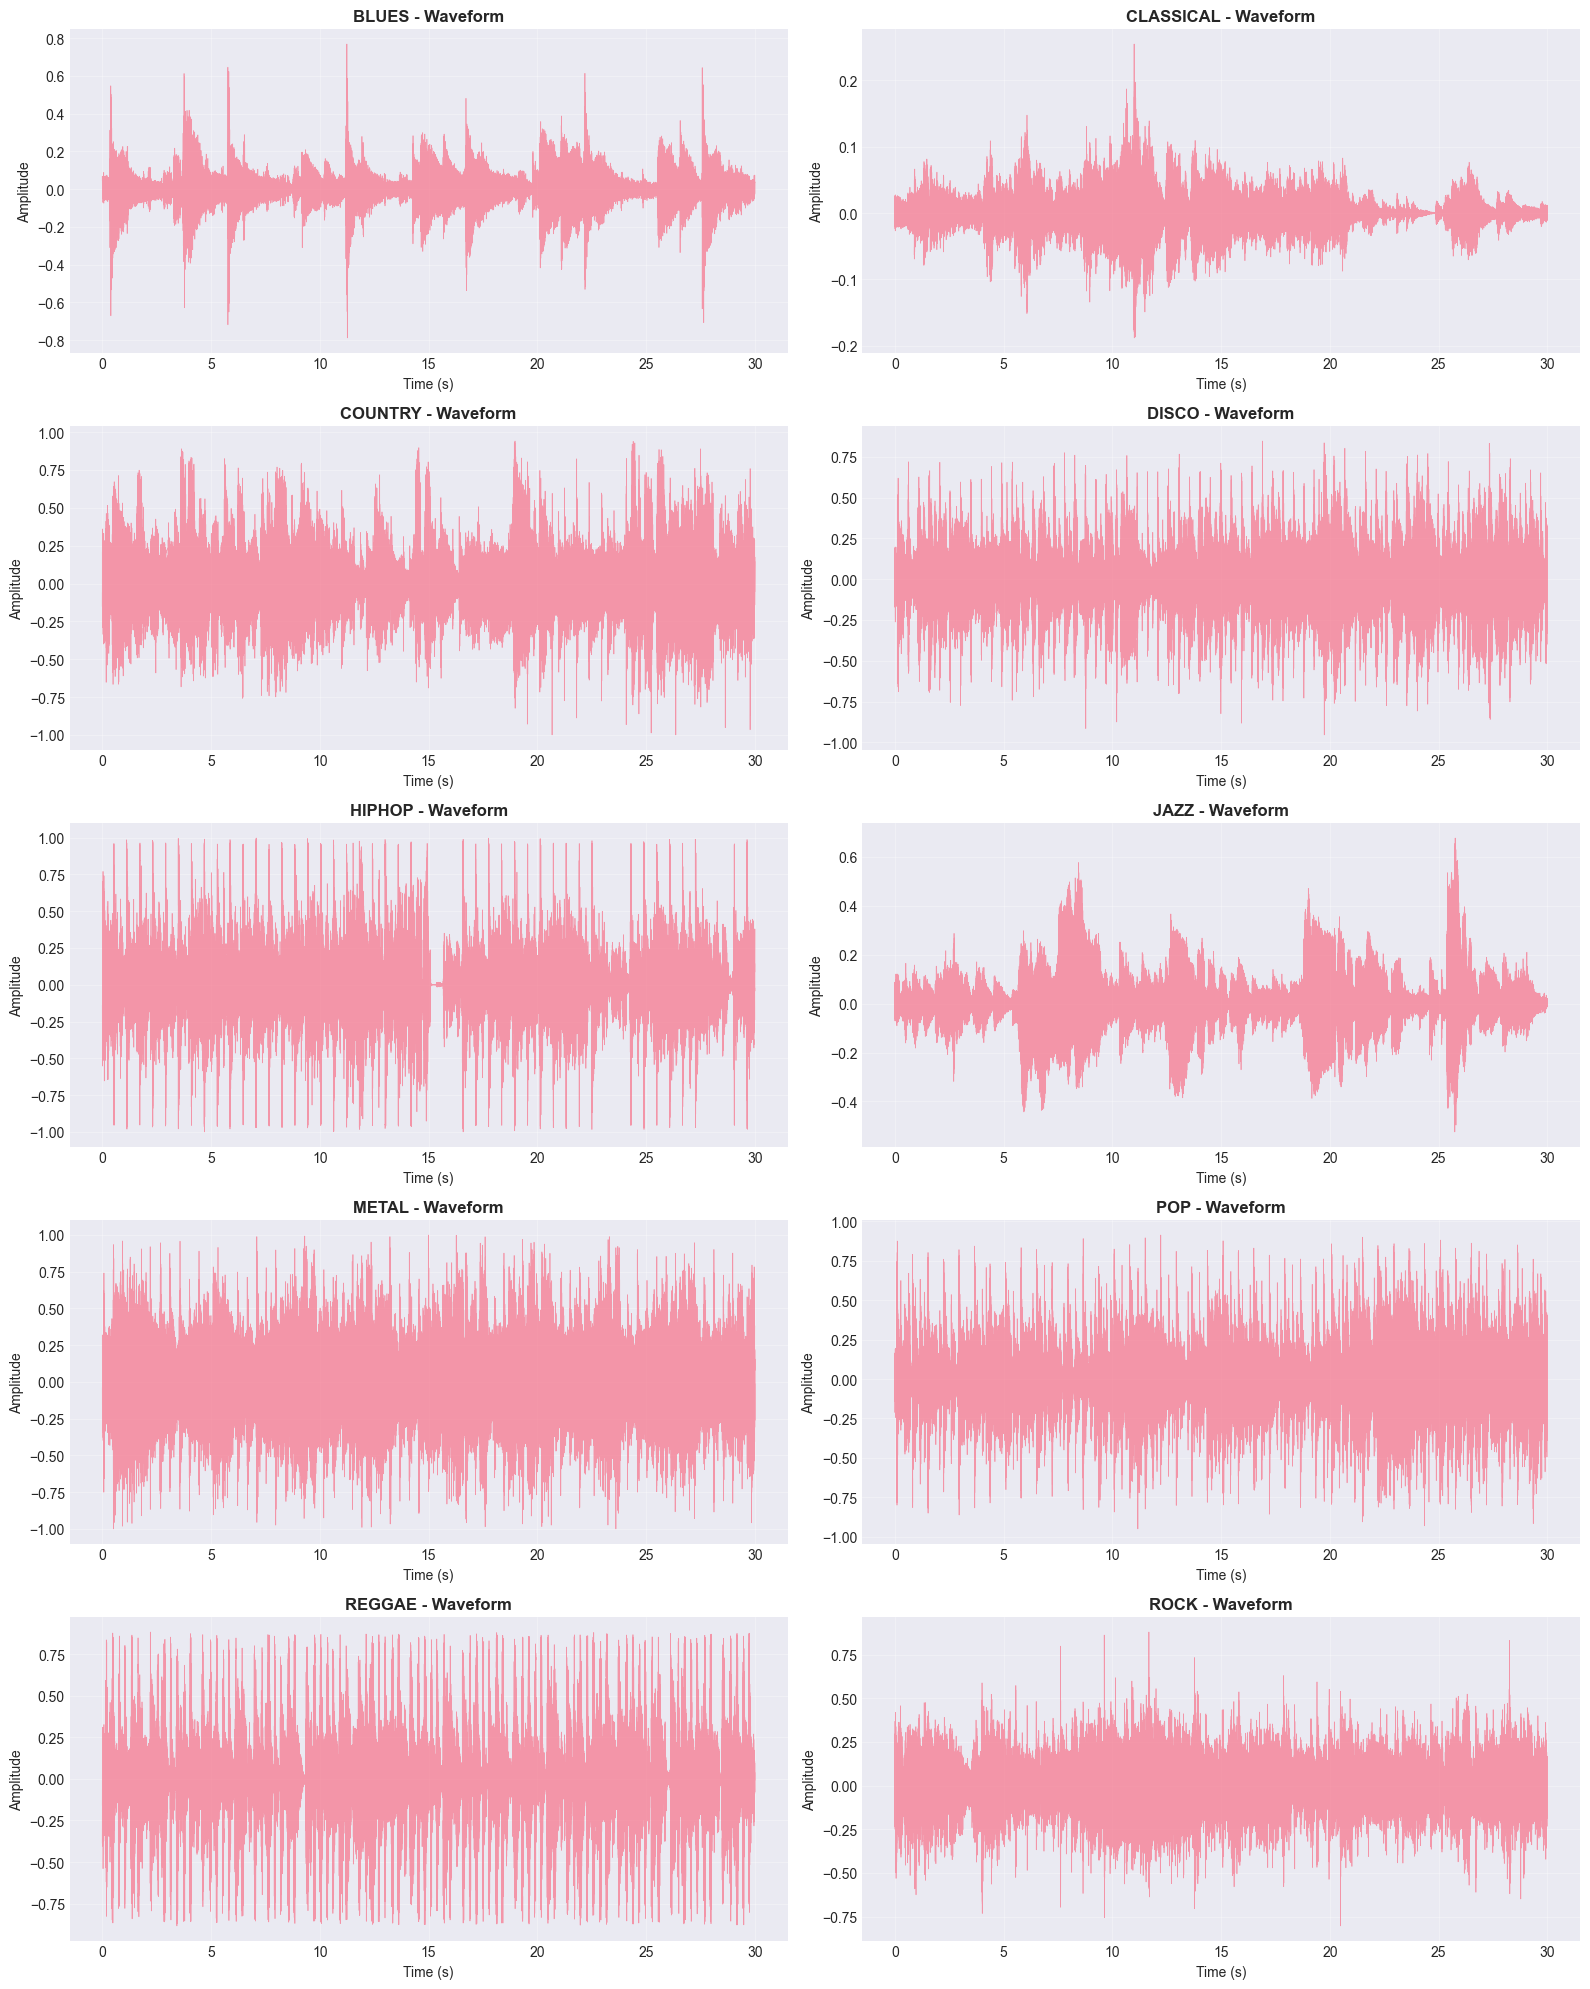

Chart saved: charts/15_waveforms_by_genre.png


In [27]:
# Load and visualize sample audio files from each genre
fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, genre in enumerate(sorted(genres)):
    genre_path = os.path.join(audio_dir, genre)
    audio_files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    
    if audio_files:
        # Load first audio file
        audio_path = os.path.join(genre_path, audio_files[0])
        y, sr = librosa.load(audio_path, duration=30)
        
        # Plot waveform using matplotlib directly (compatibility fix)
        times = np.linspace(0, len(y) / sr, num=len(y))
        axes[idx].plot(times, y, linewidth=0.5, alpha=0.7)
        axes[idx].set_title(f'{genre.upper()} - Waveform', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Time (s)', fontsize=10)
        axes[idx].set_ylabel('Amplitude', fontsize=10)
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('charts/15_waveforms_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/15_waveforms_by_genre.png")

## 10. Mel Spectrogram Visualization

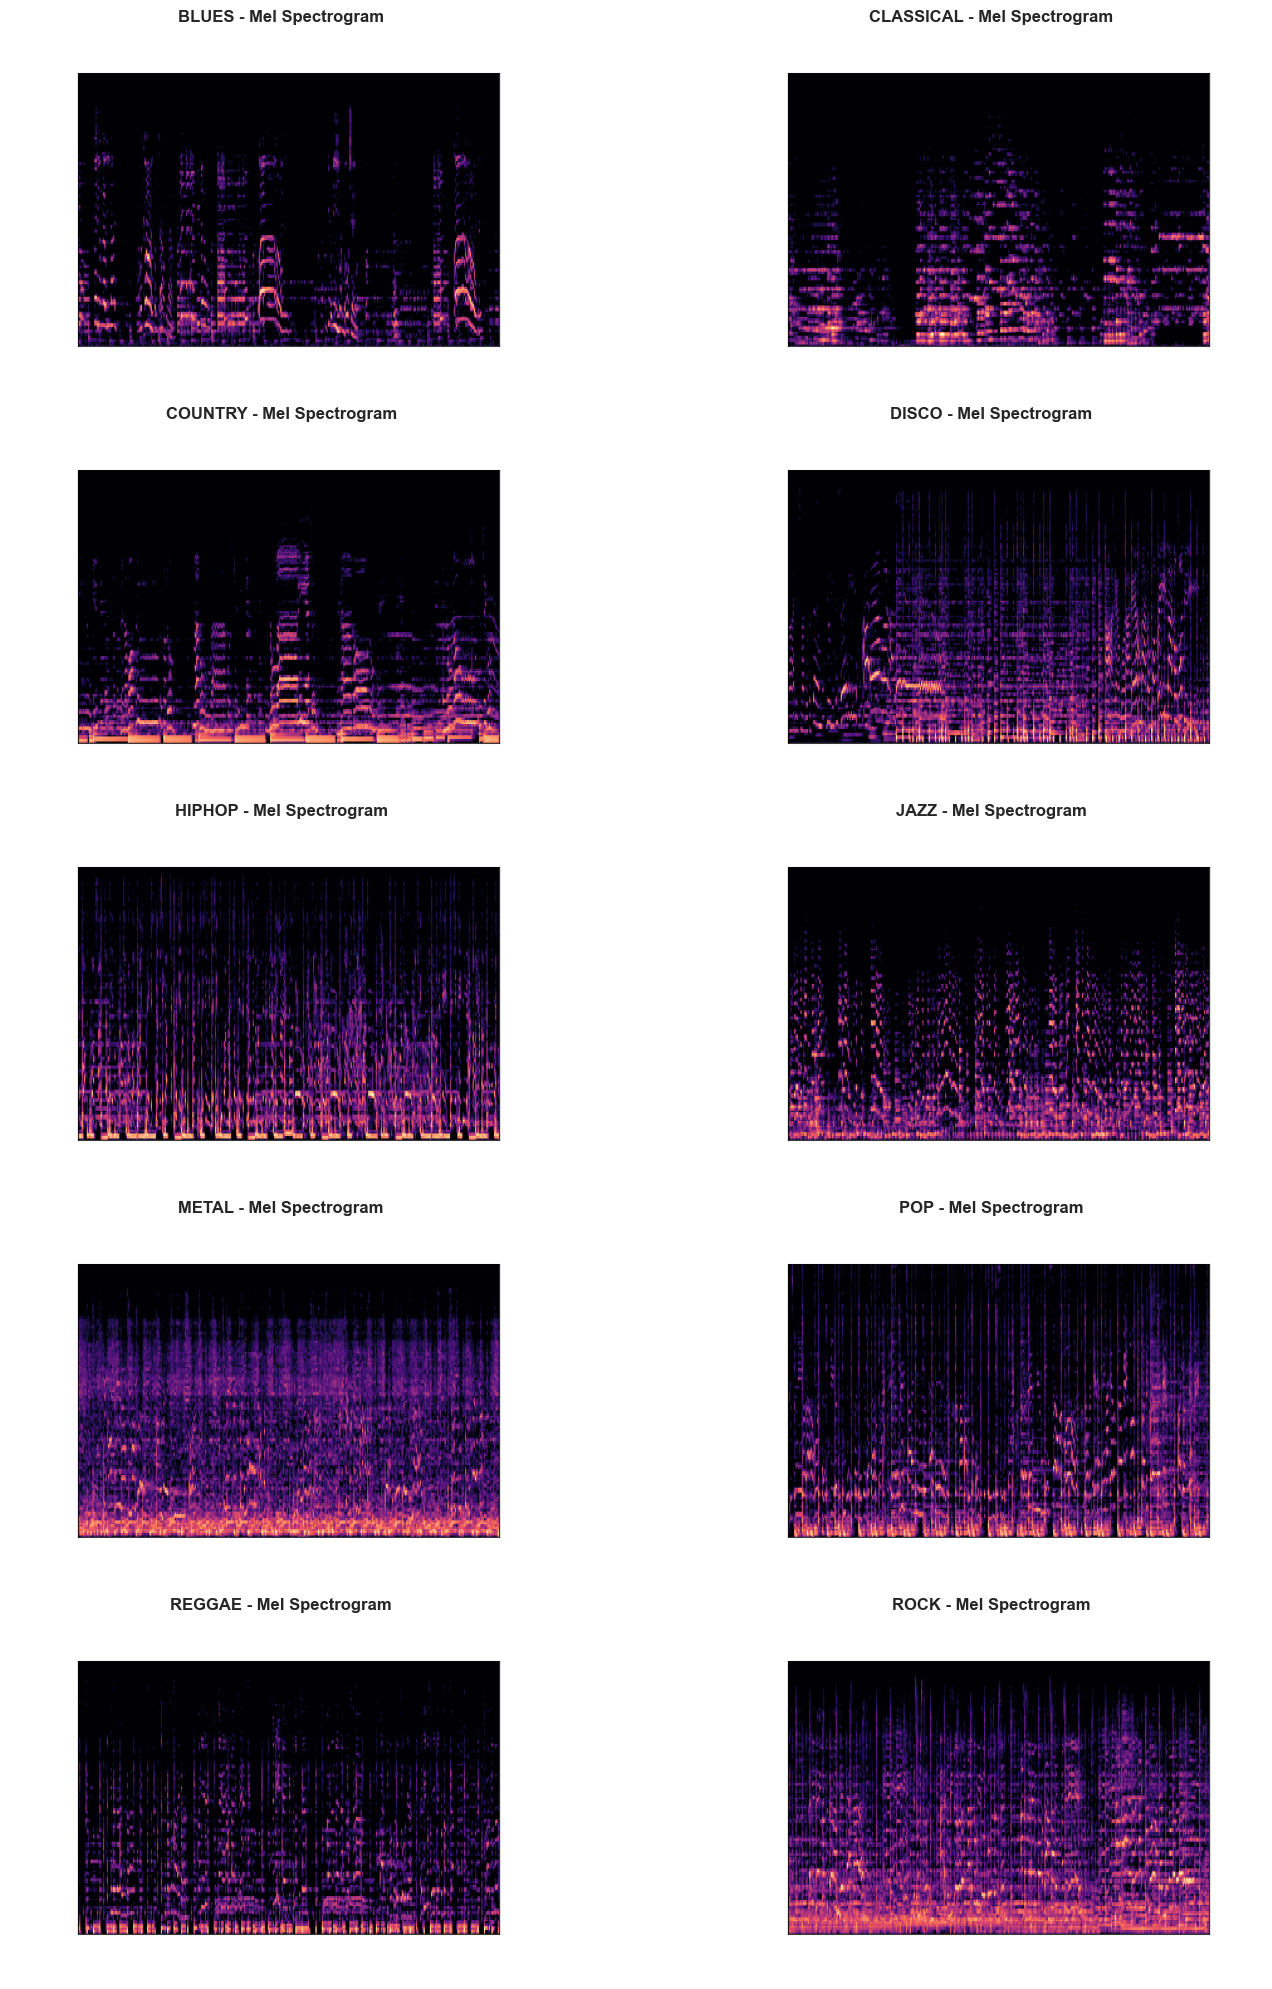

Chart saved: charts/16_mel_spectrograms_by_genre.png


In [28]:
# Visualize mel spectrograms from images_original
images_dir = 'Data/images_original/'

fig, axes = plt.subplots(5, 2, figsize=(16, 20))
axes = axes.ravel()

for idx, genre in enumerate(sorted(genres)):
    genre_path = os.path.join(images_dir, genre)
    image_files = [f for f in os.listdir(genre_path) if f.endswith('.png')]
    
    if image_files:
        # Load first image
        image_path = os.path.join(genre_path, image_files[0])
        img = Image.open(image_path)
        
        axes[idx].imshow(img)
        axes[idx].set_title(f'{genre.upper()} - Mel Spectrogram', fontsize=12, fontweight='bold')
        axes[idx].axis('off')

plt.tight_layout()
plt.savefig('charts/16_mel_spectrograms_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/16_mel_spectrograms_by_genre.png")

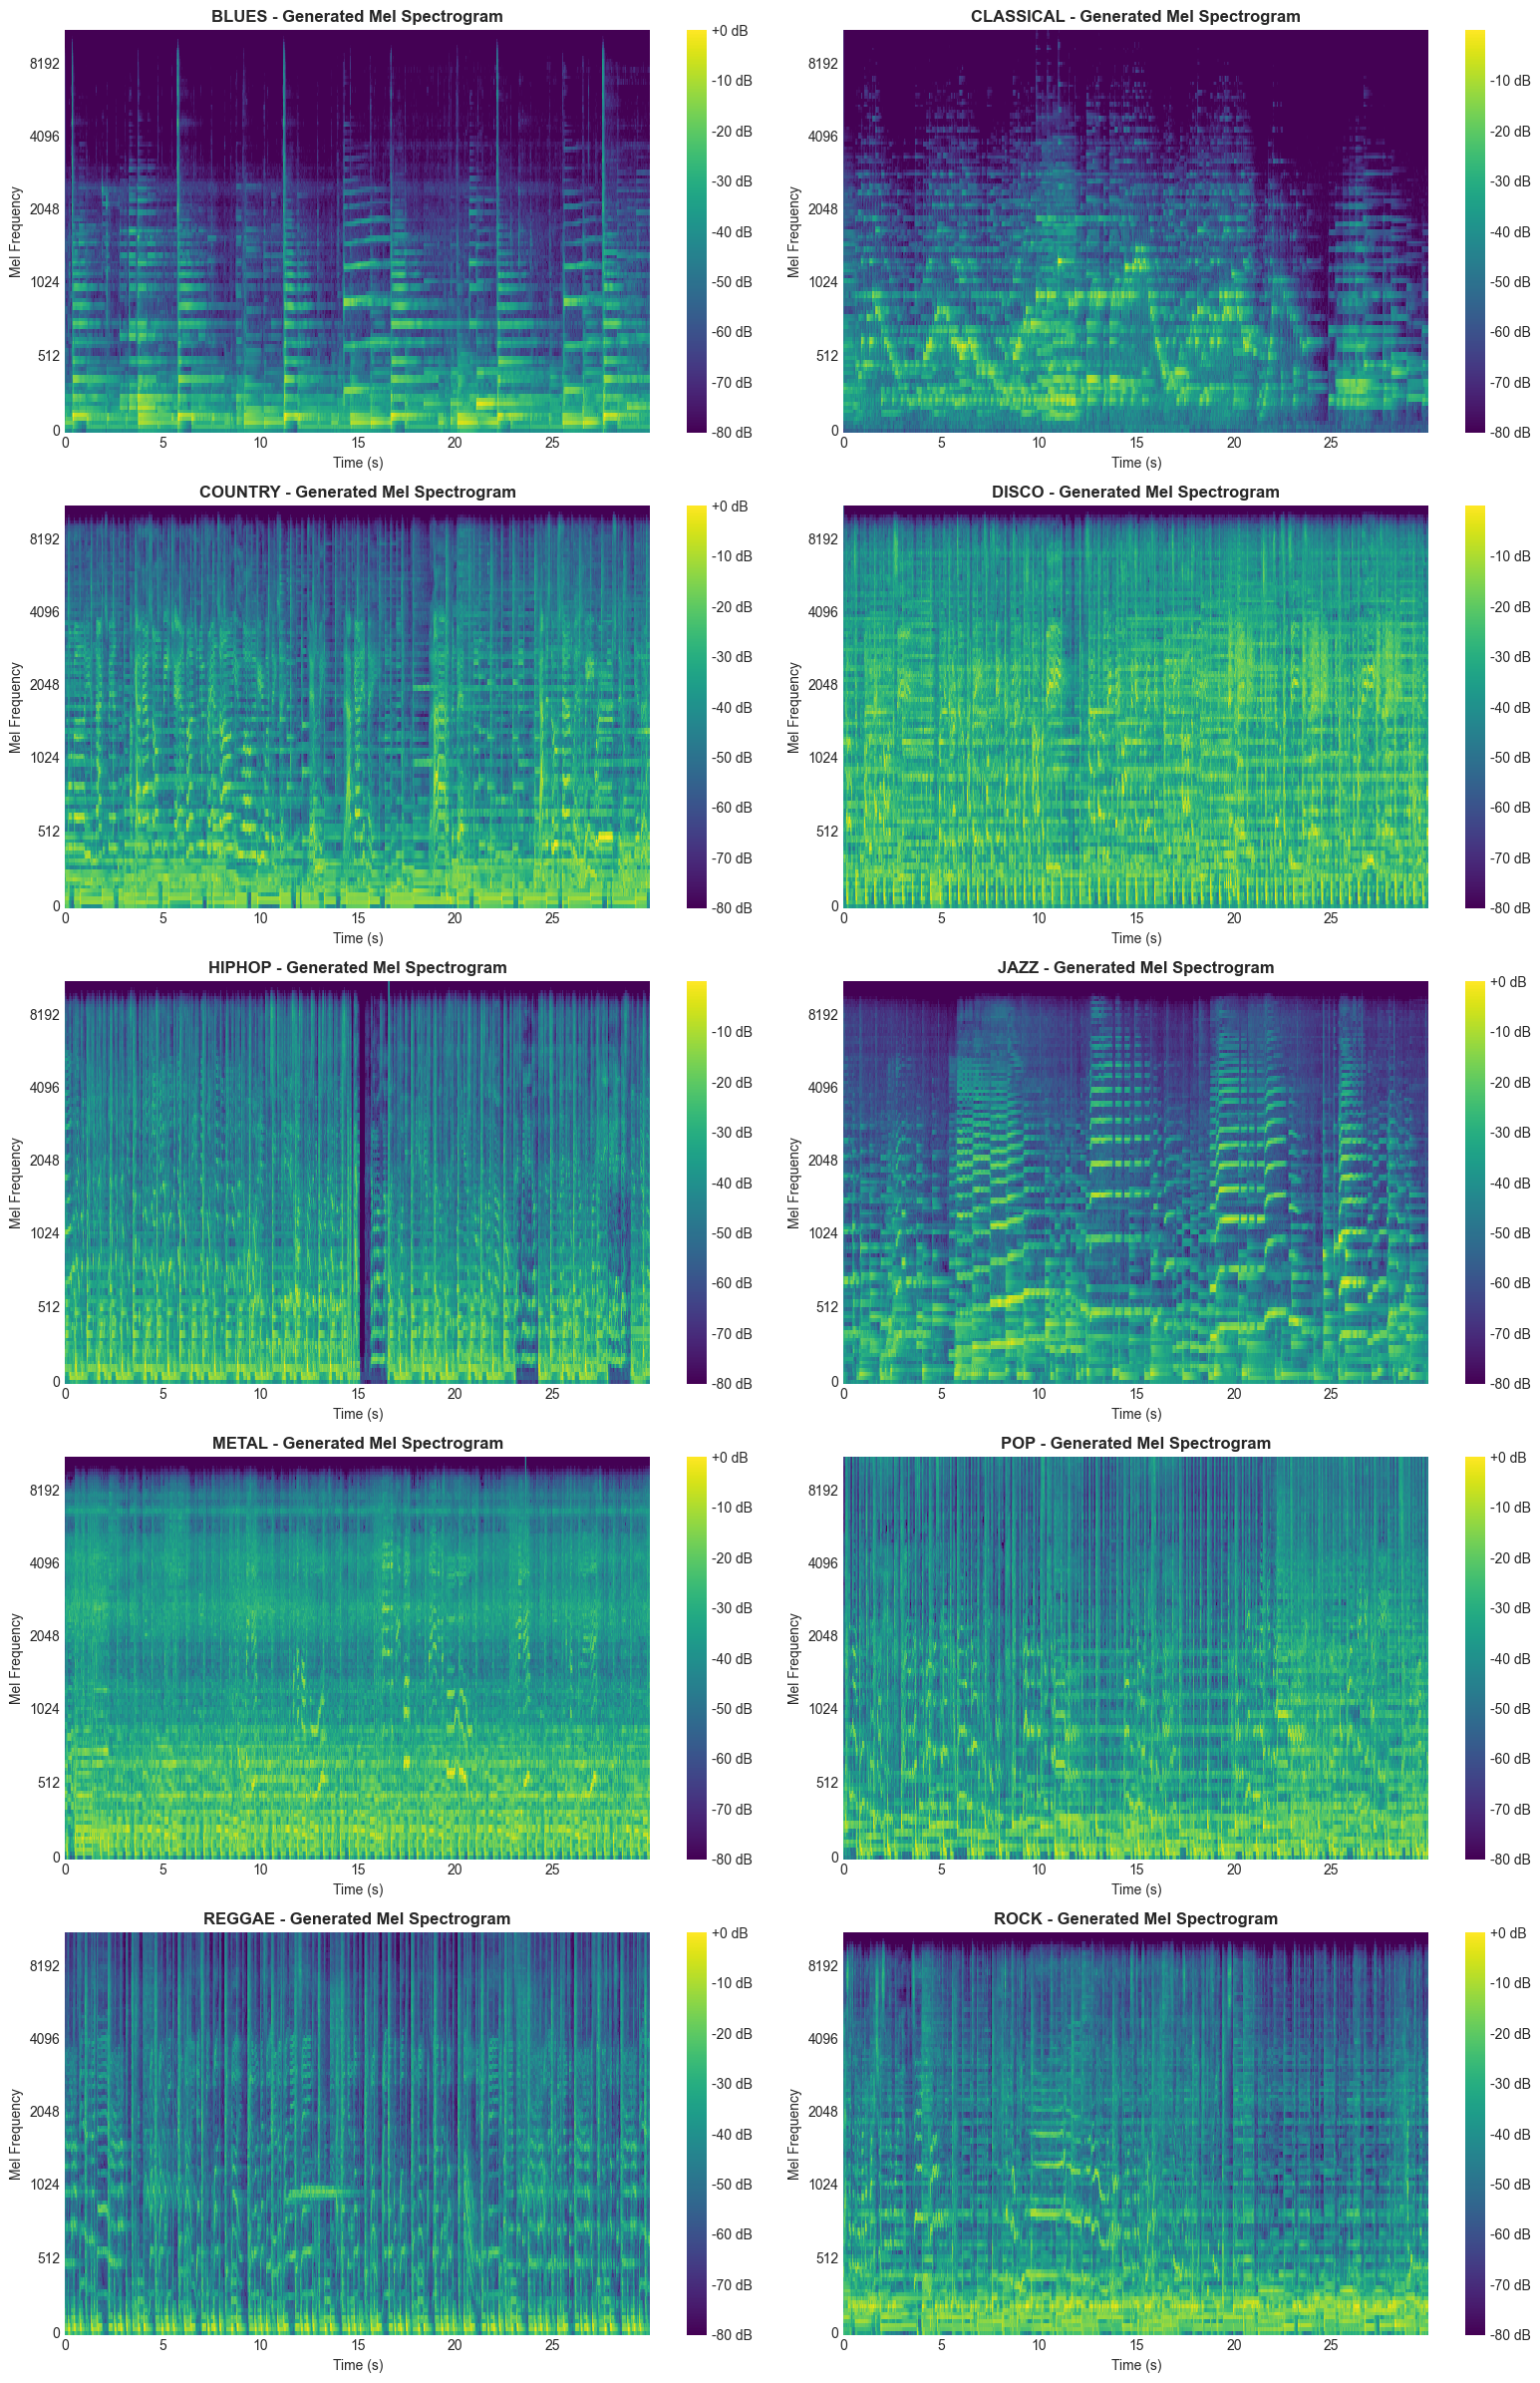

Chart saved: charts/17_generated_mel_spectrograms.png


In [29]:
# Generate mel spectrograms from audio files using librosa
fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = axes.ravel()

for idx, genre in enumerate(sorted(genres)):
    genre_path = os.path.join(audio_dir, genre)
    audio_files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    
    if audio_files:
        # Load audio file
        audio_path = os.path.join(genre_path, audio_files[0])
        y, sr = librosa.load(audio_path, duration=30)
        
        # Generate mel spectrogram
        S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
        S_dB = librosa.power_to_db(S, ref=np.max)
        
        # Plot
        img = librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', 
                                       ax=axes[idx], cmap='viridis')
        axes[idx].set_title(f'{genre.upper()} - Generated Mel Spectrogram', 
                           fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Time (s)', fontsize=10)
        axes[idx].set_ylabel('Mel Frequency', fontsize=10)
        fig.colorbar(img, ax=axes[idx], format='%+2.0f dB')

plt.tight_layout()
plt.savefig('charts/17_generated_mel_spectrograms.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/17_generated_mel_spectrograms.png")

## 11. Chroma Features Analysis

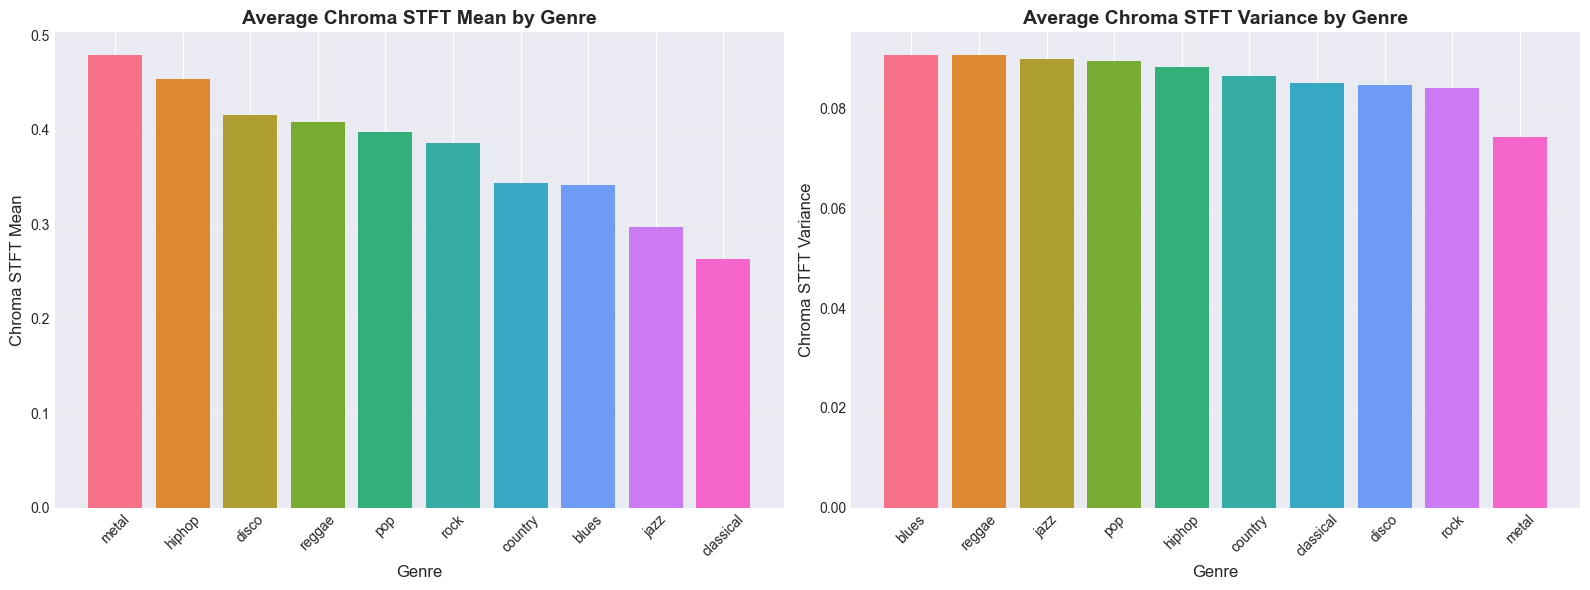

Chart saved: charts/18_chroma_features_by_genre.png


In [30]:
# Analyze chroma features
chroma_means = df_30sec.groupby('label')['chroma_stft_mean'].mean().sort_values(ascending=False)
chroma_vars = df_30sec.groupby('label')['chroma_stft_var'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Chroma mean
axes[0].bar(chroma_means.index, chroma_means.values, color=sns.color_palette('husl', len(chroma_means)))
axes[0].set_title('Average Chroma STFT Mean by Genre', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Genre', fontsize=12)
axes[0].set_ylabel('Chroma STFT Mean', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', alpha=0.3)

# Chroma variance
axes[1].bar(chroma_vars.index, chroma_vars.values, color=sns.color_palette('husl', len(chroma_vars)))
axes[1].set_title('Average Chroma STFT Variance by Genre', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Genre', fontsize=12)
axes[1].set_ylabel('Chroma STFT Variance', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('charts/18_chroma_features_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/18_chroma_features_by_genre.png")

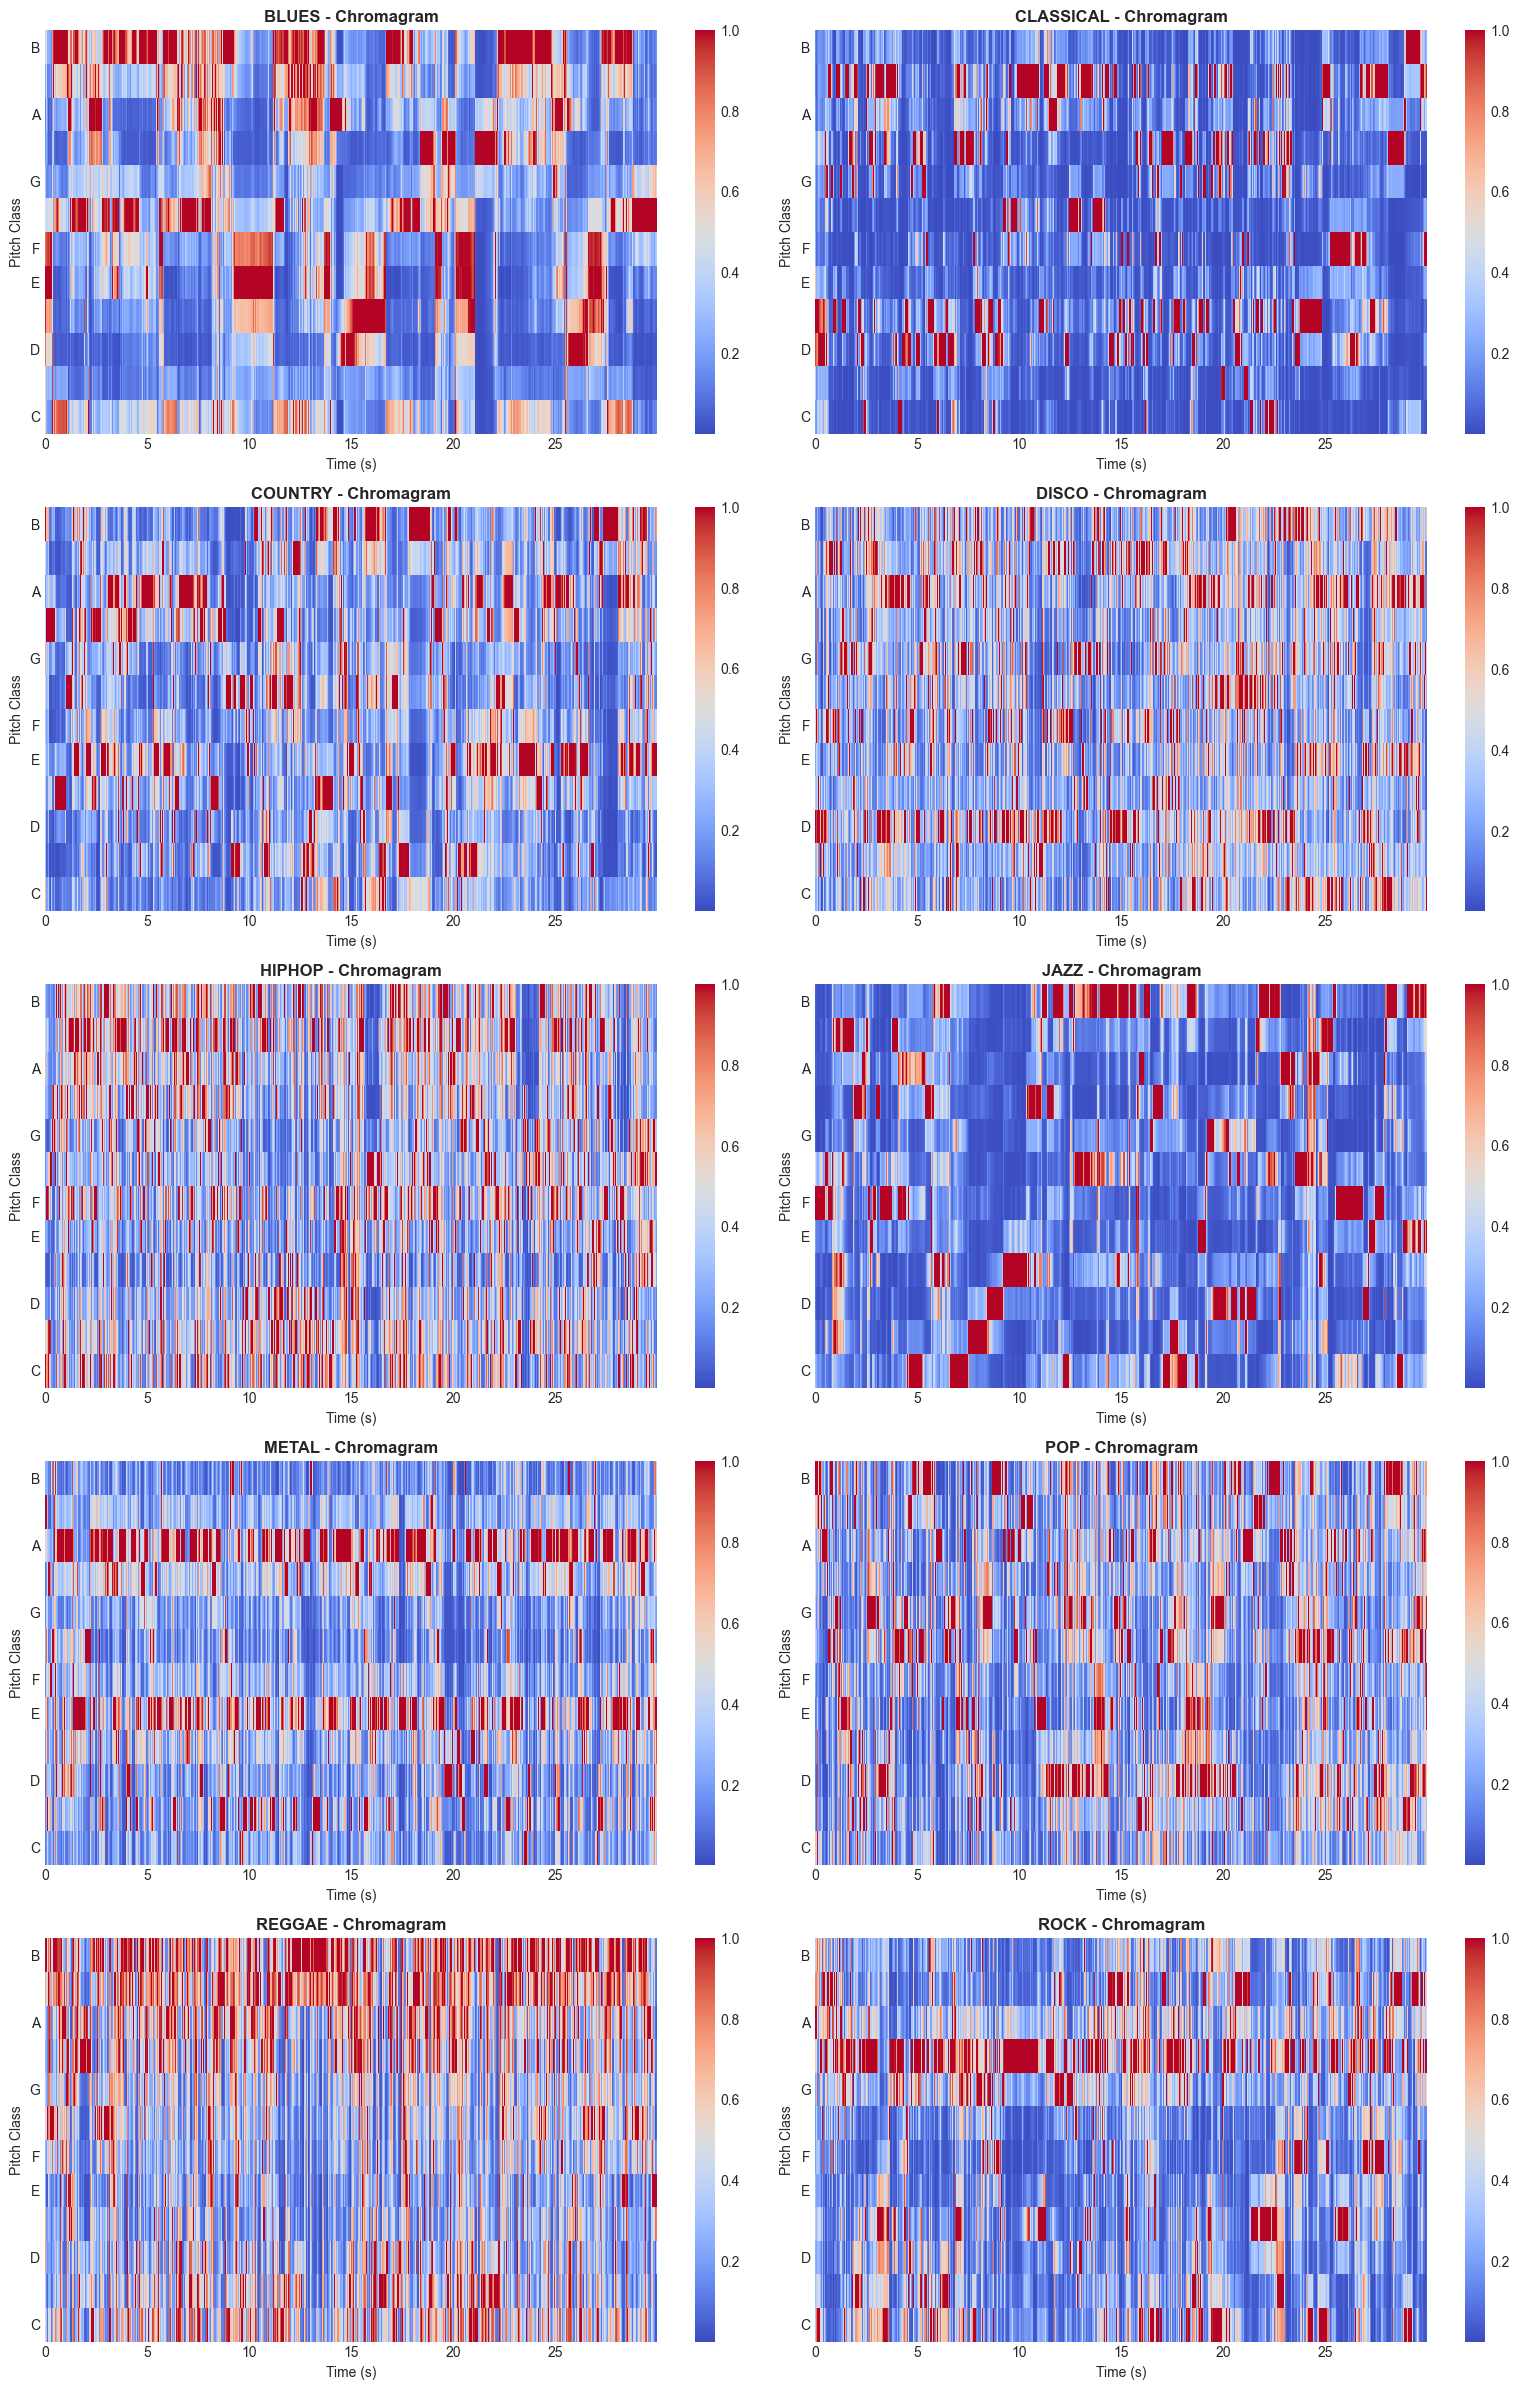

Chart saved: charts/19_chromagrams_by_genre.png


In [31]:
# Generate chromagram for sample audio files
fig, axes = plt.subplots(5, 2, figsize=(16, 24))
axes = axes.ravel()

for idx, genre in enumerate(sorted(genres)):
    genre_path = os.path.join(audio_dir, genre)
    audio_files = [f for f in os.listdir(genre_path) if f.endswith('.wav')]
    
    if audio_files:
        # Load audio file
        audio_path = os.path.join(genre_path, audio_files[0])
        y, sr = librosa.load(audio_path, duration=30)
        
        # Generate chromagram
        chroma = librosa.feature.chroma_stft(y=y, sr=sr)
        
        # Plot
        img = librosa.display.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma',
                                       ax=axes[idx], cmap='coolwarm')
        axes[idx].set_title(f'{genre.upper()} - Chromagram', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel('Time (s)', fontsize=10)
        axes[idx].set_ylabel('Pitch Class', fontsize=10)
        fig.colorbar(img, ax=axes[idx])

plt.tight_layout()
plt.savefig('charts/19_chromagrams_by_genre.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/19_chromagrams_by_genre.png")

## 12. Feature Variance Analysis

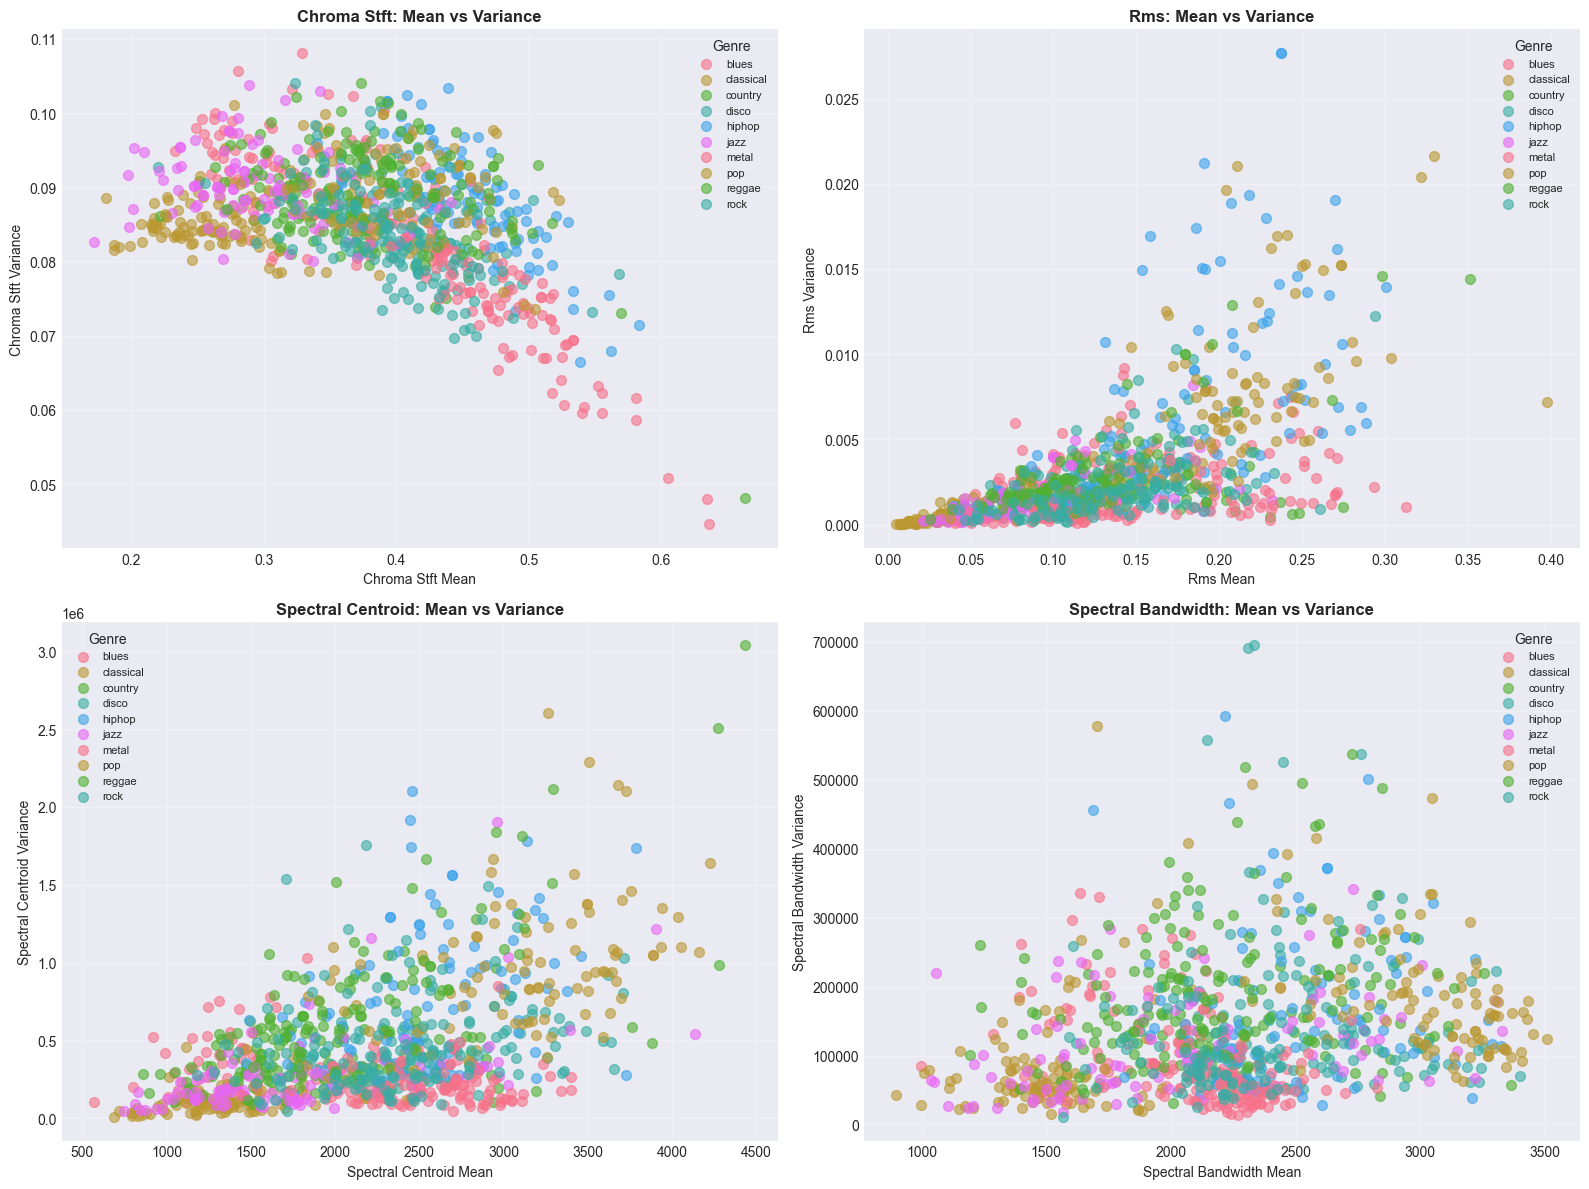

Chart saved: charts/20_mean_vs_variance.png


In [32]:
# Compare mean vs variance for key features
variance_features = ['chroma_stft', 'rms', 'spectral_centroid', 'spectral_bandwidth']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, feature in enumerate(variance_features):
    mean_col = f'{feature}_mean'
    var_col = f'{feature}_var'
    
    for genre in df_30sec['label'].unique():
        genre_data = df_30sec[df_30sec['label'] == genre]
        axes[idx].scatter(genre_data[mean_col], genre_data[var_col], 
                         label=genre, alpha=0.6, s=50)
    
    axes[idx].set_title(f'{feature.replace("_", " ").title()}: Mean vs Variance',
                       fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(f'{feature.replace("_", " ").title()} Mean', fontsize=10)
    axes[idx].set_ylabel(f'{feature.replace("_", " ").title()} Variance', fontsize=10)
    axes[idx].legend(title='Genre', fontsize=8)
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('charts/20_mean_vs_variance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/20_mean_vs_variance.png")

## 13. Genre Similarity Analysis

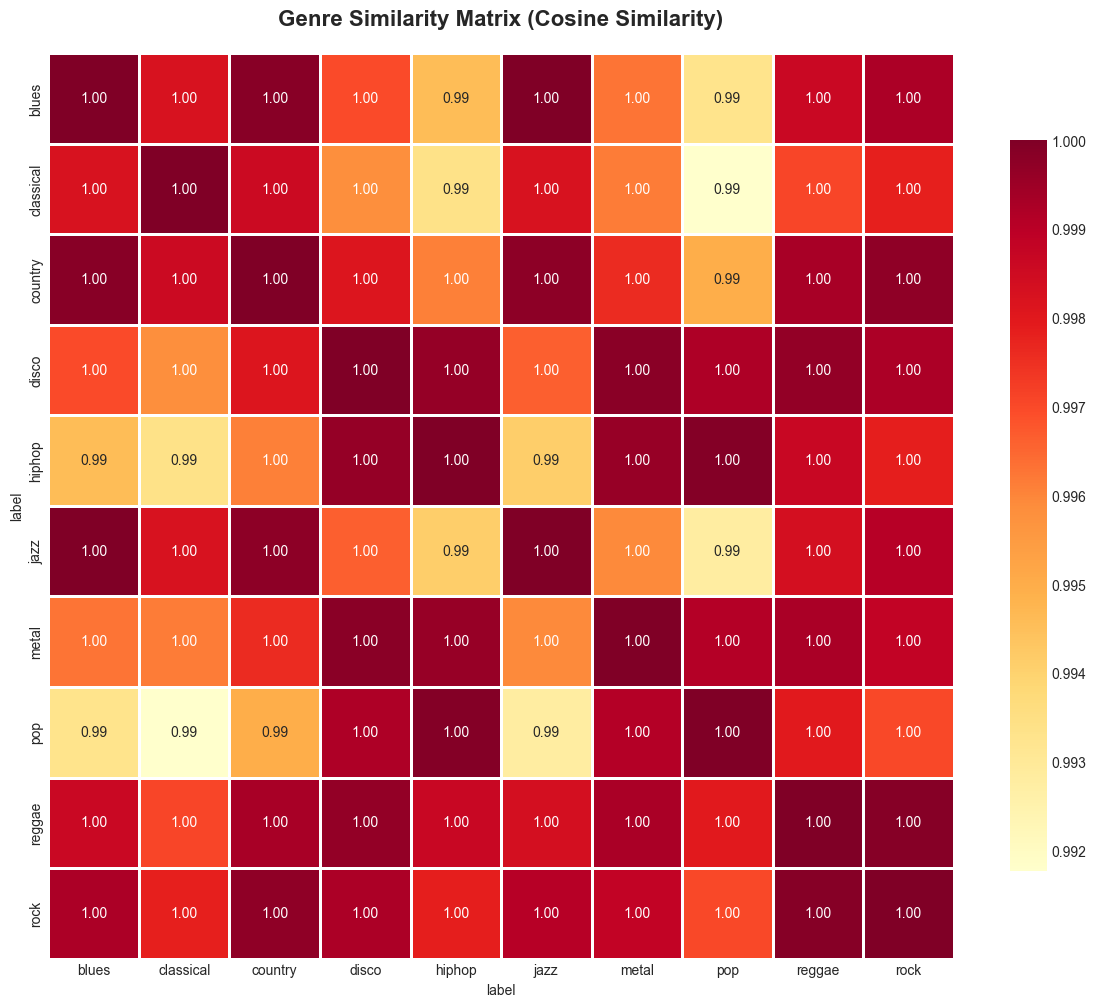

Chart saved: charts/21_genre_similarity_matrix.png


In [33]:
# Calculate average feature values per genre
genre_profiles = df_30sec.groupby('label')[feature_cols].mean()

# Calculate genre similarity matrix
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# Cosine similarity
genre_similarity = cosine_similarity(genre_profiles)
genre_similarity_df = pd.DataFrame(genre_similarity, 
                                   index=genre_profiles.index, 
                                   columns=genre_profiles.index)

plt.figure(figsize=(12, 10))
sns.heatmap(genre_similarity_df, annot=True, fmt='.2f', cmap='YlOrRd',
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Genre Similarity Matrix (Cosine Similarity)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('charts/21_genre_similarity_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/21_genre_similarity_matrix.png")

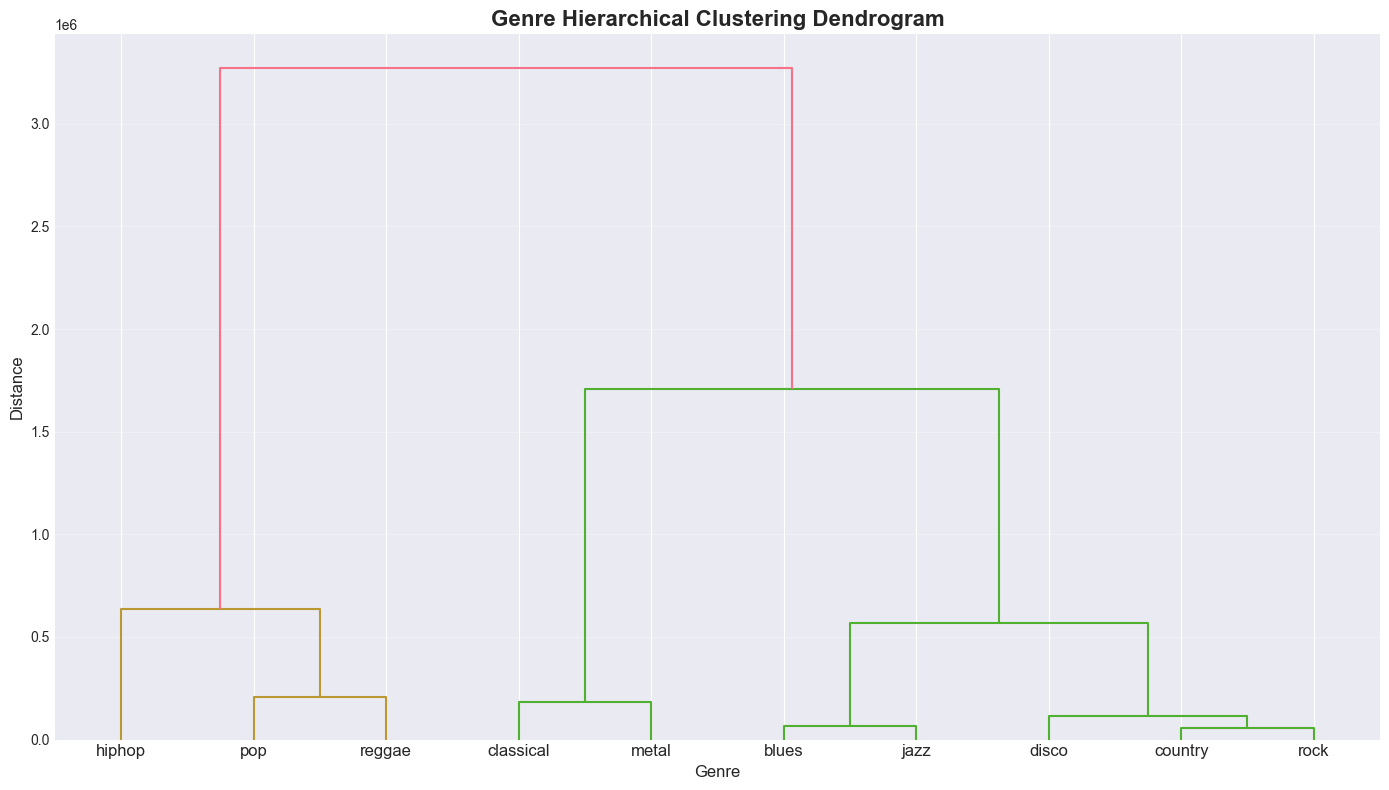

Chart saved: charts/22_genre_dendrogram.png


In [34]:
# Hierarchical clustering of genres
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering
linkage_matrix = linkage(genre_profiles, method='ward')

plt.figure(figsize=(14, 8))
dendrogram(linkage_matrix, labels=genre_profiles.index, leaf_font_size=12)
plt.title('Genre Hierarchical Clustering Dendrogram', fontsize=16, fontweight='bold')
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('charts/22_genre_dendrogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/22_genre_dendrogram.png")

## 14. Principal Component Analysis (PCA)

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (57,) and arg 1 with shape (20,).

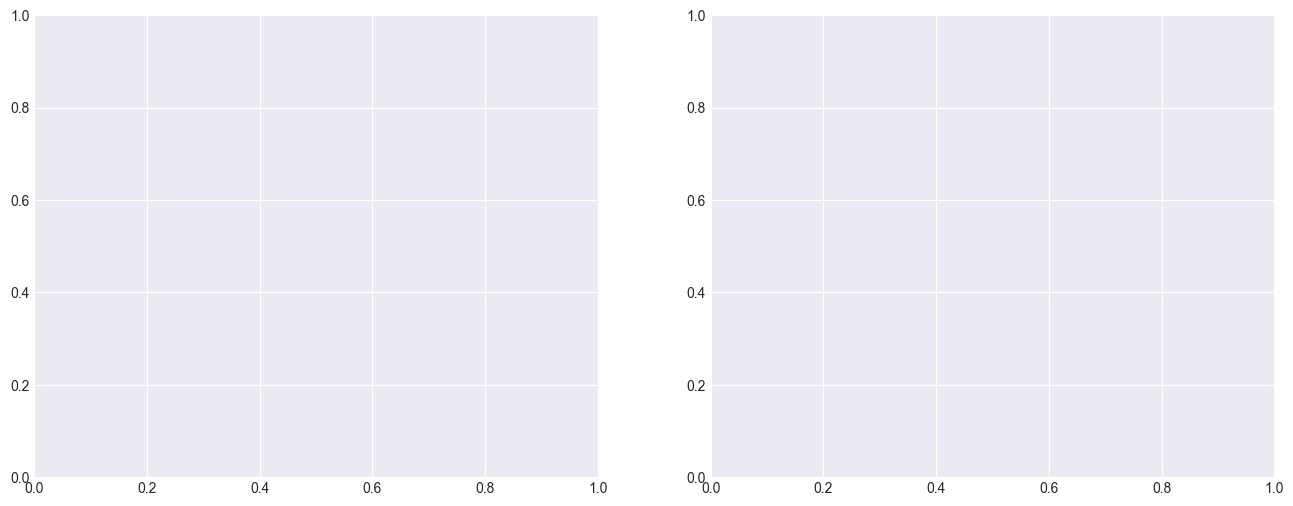

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_30sec[feature_cols])

# Apply PCA
pca = PCA()
pca_features = pca.fit_transform(features_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Individual explained variance
axes[0].bar(range(1, len(explained_variance) + 1), explained_variance[:20], 
           color='steelblue', edgecolor='black')
axes[0].set_title('PCA Explained Variance Ratio (Top 20 Components)', 
                 fontsize=14, fontweight='bold')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

# Cumulative explained variance
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 
            marker='o', linewidth=2, markersize=6, color='darkred')
axes[1].axhline(y=0.95, color='green', linestyle='--', linewidth=2, label='95% Variance')
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('charts/23_pca_explained_variance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/23_pca_explained_variance.png")

# Find number of components for 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"\nNumber of components explaining 95% variance: {n_components_95}")

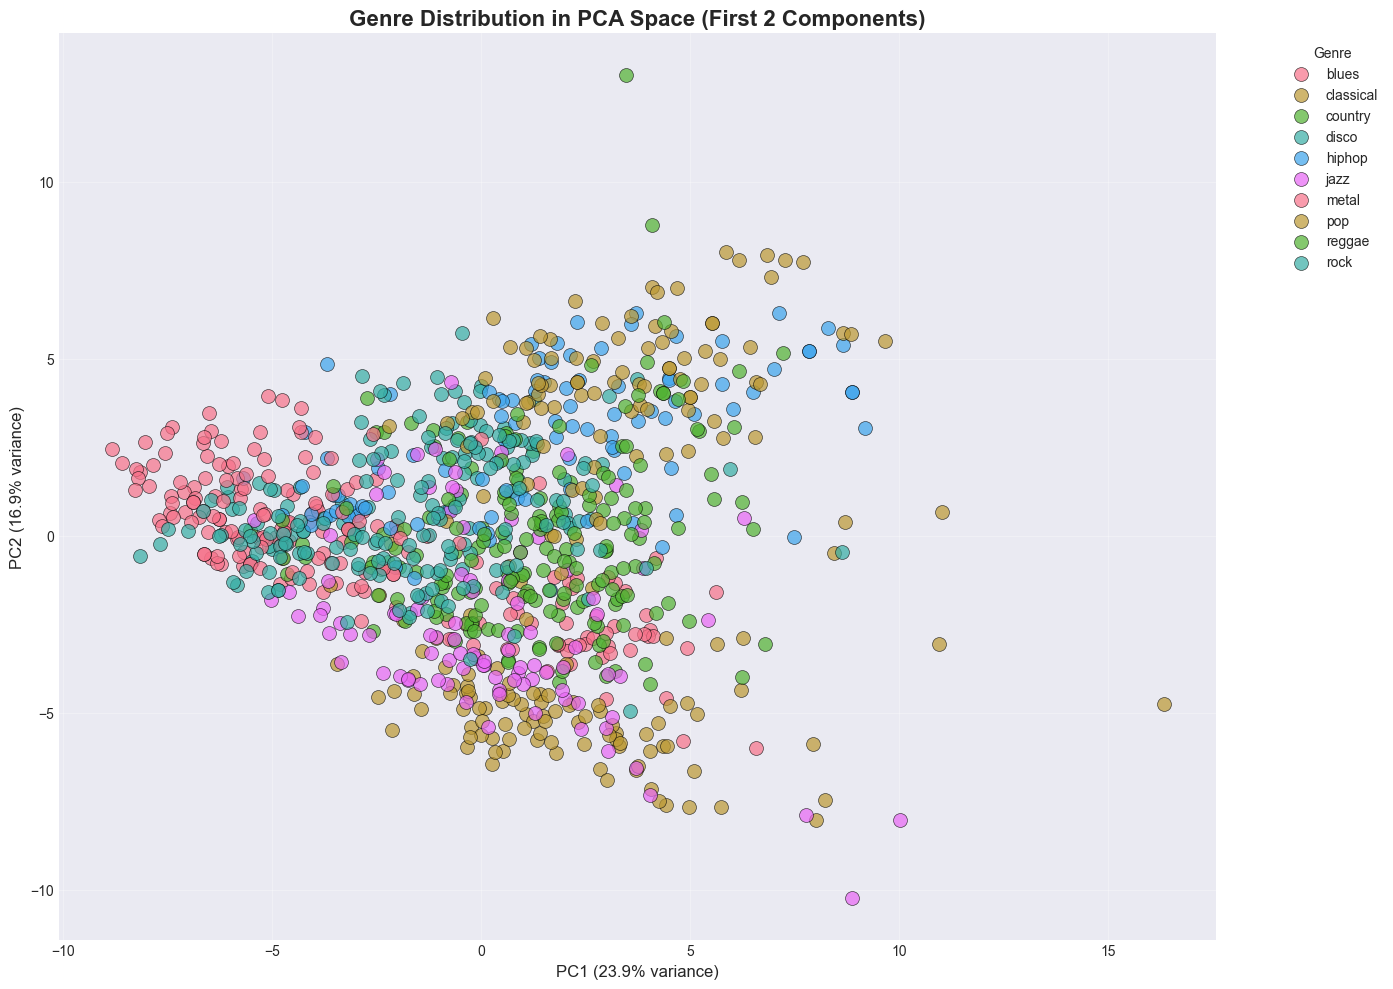

Chart saved: charts/24_pca_2d_visualization.png


In [36]:
# 2D PCA visualization
plt.figure(figsize=(14, 10))

for genre in df_30sec['label'].unique():
    genre_mask = df_30sec['label'] == genre
    plt.scatter(pca_features[genre_mask, 0], pca_features[genre_mask, 1],
               label=genre, alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

plt.title('Genre Distribution in PCA Space (First 2 Components)', 
         fontsize=16, fontweight='bold')
plt.xlabel(f'PC1 ({explained_variance[0]*100:.1f}% variance)', fontsize=12)
plt.ylabel(f'PC2 ({explained_variance[1]*100:.1f}% variance)', fontsize=12)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('charts/24_pca_2d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/24_pca_2d_visualization.png")

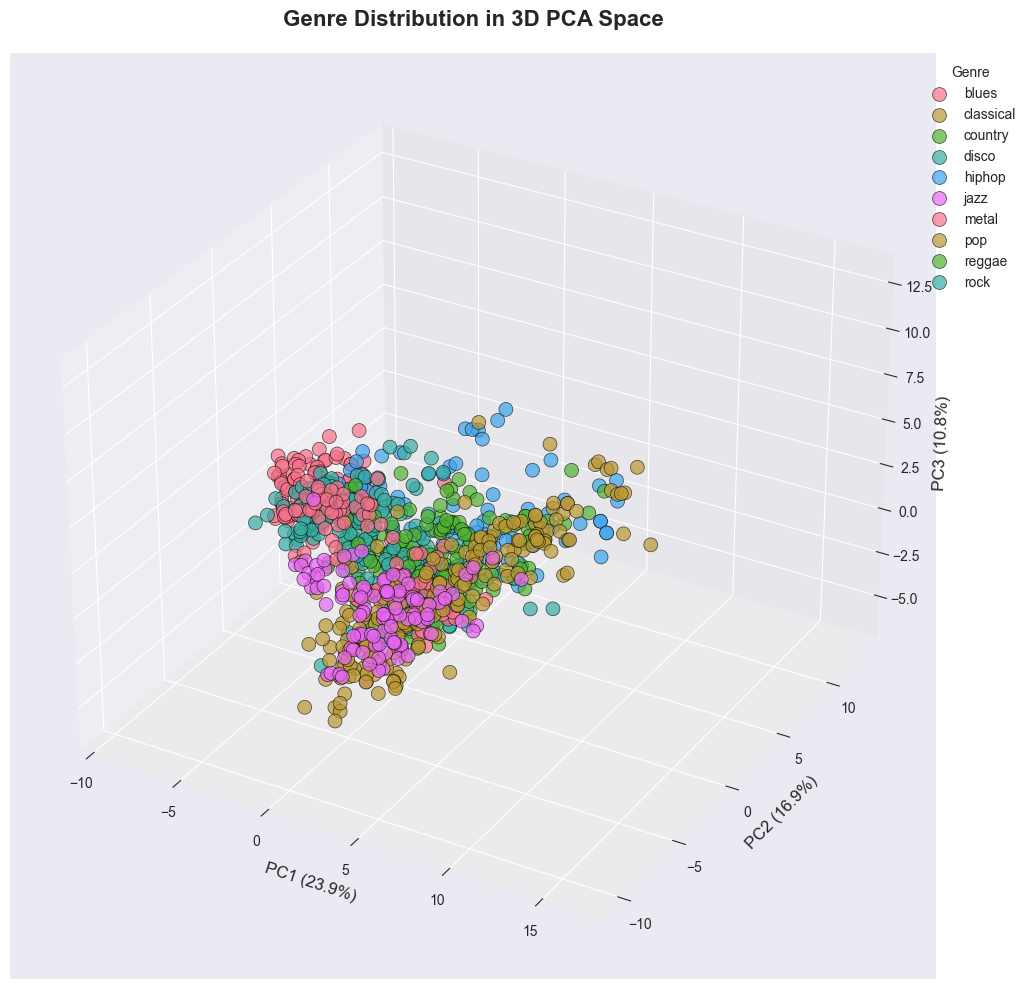

Chart saved: charts/25_pca_3d_visualization.png


In [37]:
# 3D PCA visualization
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

for genre in df_30sec['label'].unique():
    genre_mask = df_30sec['label'] == genre
    ax.scatter(pca_features[genre_mask, 0], 
              pca_features[genre_mask, 1],
              pca_features[genre_mask, 2],
              label=genre, alpha=0.7, s=100, edgecolors='black', linewidth=0.5)

ax.set_title('Genre Distribution in 3D PCA Space', fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel(f'PC1 ({explained_variance[0]*100:.1f}%)', fontsize=12)
ax.set_ylabel(f'PC2 ({explained_variance[1]*100:.1f}%)', fontsize=12)
ax.set_zlabel(f'PC3 ({explained_variance[2]*100:.1f}%)', fontsize=12)
ax.legend(title='Genre', bbox_to_anchor=(1.1, 1))
plt.tight_layout()
plt.savefig('charts/25_pca_3d_visualization.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/25_pca_3d_visualization.png")

## 15. Statistical Tests

In [38]:
# ANOVA test for tempo differences across genres
from scipy.stats import f_oneway

genre_tempo_groups = [df_30sec[df_30sec['label'] == genre]['tempo'].values 
                      for genre in df_30sec['label'].unique()]

f_stat, p_value = f_oneway(*genre_tempo_groups)

print("=" * 80)
print("ANOVA TEST: Tempo Differences Across Genres")
print("=" * 80)
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")
print(f"\nResult: {'Significant difference' if p_value < 0.05 else 'No significant difference'} "
      f"in tempo across genres (α=0.05)")

ANOVA TEST: Tempo Differences Across Genres
F-statistic: 5.5142
P-value: 0.000000

Result: Significant difference in tempo across genres (α=0.05)


In [39]:
# ANOVA tests for all key features
print("\n" + "=" * 80)
print("ANOVA TESTS: Feature Differences Across Genres")
print("=" * 80)

anova_results = []

for feature in key_features:
    genre_groups = [df_30sec[df_30sec['label'] == genre][feature].values 
                   for genre in df_30sec['label'].unique()]
    f_stat, p_value = f_oneway(*genre_groups)
    anova_results.append({
        'Feature': feature,
        'F-statistic': f_stat,
        'P-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

anova_df = pd.DataFrame(anova_results)
anova_df = anova_df.sort_values('F-statistic', ascending=False)
print(anova_df.to_string(index=False))


ANOVA TESTS: Feature Differences Across Genres
                Feature  F-statistic       P-value Significant
       chroma_stft_mean   176.453282 7.683150e-199         Yes
spectral_bandwidth_mean   116.601879 9.982752e-149         Yes
           rolloff_mean   110.871317 2.939032e-143         Yes
 spectral_centroid_mean    97.484924 6.437171e-130         Yes
               rms_mean    74.194652 1.485967e-104         Yes
zero_crossing_rate_mean    58.716380  6.611053e-86         Yes
                  tempo     5.514214  1.977161e-07         Yes


## 16. Dataset Comparison (30-sec vs 3-sec)

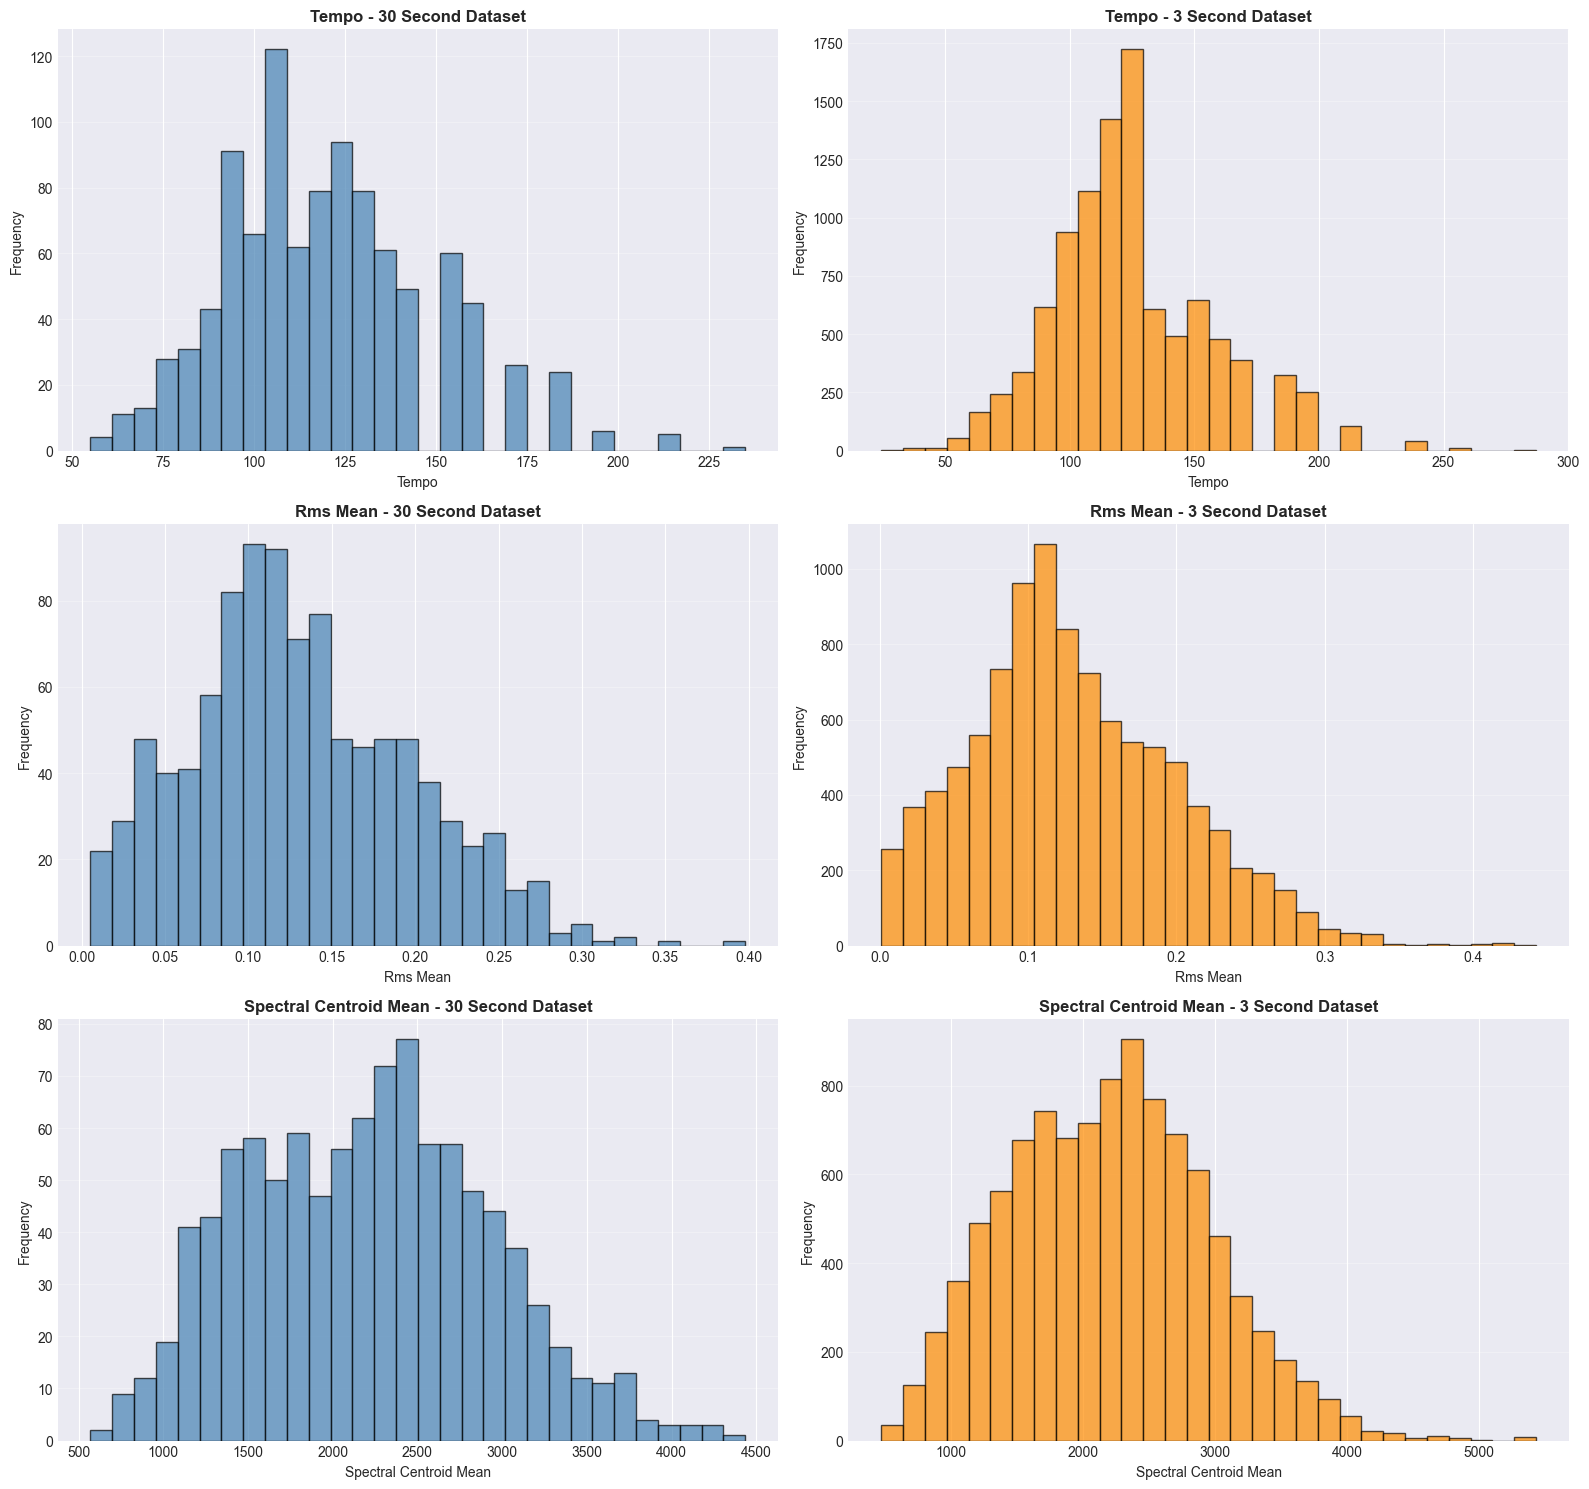

Chart saved: charts/26_dataset_comparison.png


In [40]:
# Compare feature distributions between 30-sec and 3-sec datasets
comparison_features = ['tempo', 'rms_mean', 'spectral_centroid_mean']

fig, axes = plt.subplots(3, 2, figsize=(16, 15))

for idx, feature in enumerate(comparison_features):
    # 30-sec dataset
    axes[idx, 0].hist(df_30sec[feature], bins=30, alpha=0.7, color='steelblue', edgecolor='black')
    axes[idx, 0].set_title(f'{feature.replace("_", " ").title()} - 30 Second Dataset',
                          fontsize=12, fontweight='bold')
    axes[idx, 0].set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[idx, 0].set_ylabel('Frequency', fontsize=10)
    axes[idx, 0].grid(axis='y', alpha=0.3)
    
    # 3-sec dataset
    axes[idx, 1].hist(df_3sec[feature], bins=30, alpha=0.7, color='darkorange', edgecolor='black')
    axes[idx, 1].set_title(f'{feature.replace("_", " ").title()} - 3 Second Dataset',
                          fontsize=12, fontweight='bold')
    axes[idx, 1].set_xlabel(feature.replace('_', ' ').title(), fontsize=10)
    axes[idx, 1].set_ylabel('Frequency', fontsize=10)
    axes[idx, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('charts/26_dataset_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("Chart saved: charts/26_dataset_comparison.png")

## 17. Summary and Key Findings

In [41]:
print("=" * 80)
print("GTZAN DATASET ANALYSIS - KEY FINDINGS")
print("=" * 80)

print("\n1. DATASET OVERVIEW:")
print(f"   - Total genres: {len(genre_counts_30)}")
print(f"   - Samples per genre (30-sec): {genre_counts_30.values[0]}")
print(f"   - Total samples (30-sec): {df_30sec.shape[0]}")
print(f"   - Total samples (3-sec): {df_3sec.shape[0]}")
print(f"   - Number of features: {len(feature_cols)}")
print(f"   - Class balance: Perfectly balanced dataset")

print("\n2. TEMPO ANALYSIS:")
fastest_genre = tempo_stats['mean'].idxmax()
slowest_genre = tempo_stats['mean'].idxmin()
print(f"   - Fastest genre: {fastest_genre} ({tempo_stats.loc[fastest_genre, 'mean']:.1f} BPM)")
print(f"   - Slowest genre: {slowest_genre} ({tempo_stats.loc[slowest_genre, 'mean']:.1f} BPM)")

print("\n3. SPECTRAL FEATURES:")
print(f"   - Spectral features show clear differentiation between genres")
print(f"   - Metal and Rock have higher spectral centroids (brighter sound)")
print(f"   - Classical and Jazz show more variation in spectral features")

print("\n4. MFCC ANALYSIS:")
print(f"   - 20 MFCC coefficients extracted (mean and variance)")
print(f"   - First few coefficients show strongest genre differentiation")
print(f"   - MFCC patterns are distinctive for each genre")

print("\n5. GENRE SIMILARITY:")
# Find most similar genres
similarity_copy = genre_similarity_df.copy()
np.fill_diagonal(similarity_copy.values, 0)
max_similarity_idx = similarity_copy.stack().idxmax()
max_similarity_val = similarity_copy.stack().max()
print(f"   - Most similar genres: {max_similarity_idx[0]} and {max_similarity_idx[1]} "
      f"(similarity: {max_similarity_val:.3f})")

print("\n6. DIMENSIONALITY:")
print(f"   - {n_components_95} principal components explain 95% of variance")
print(f"   - First 3 components explain {cumulative_variance[2]*100:.1f}% of variance")

print("\n7. STATISTICAL SIGNIFICANCE:")
significant_features = anova_df[anova_df['Significant'] == 'Yes']
print(f"   - {len(significant_features)}/{len(key_features)} key features show "
      f"significant differences across genres")

print("\n8. DATA QUALITY:")
print(f"   - No missing values detected")
print(f"   - All audio files are 30 seconds long")
print(f"   - Mel spectrograms available for visual analysis")

print("\n" + "=" * 80)
print("Analysis complete! All charts saved to the 'charts/' directory.")
print("=" * 80)

GTZAN DATASET ANALYSIS - KEY FINDINGS

1. DATASET OVERVIEW:
   - Total genres: 10
   - Samples per genre (30-sec): 100
   - Total samples (30-sec): 1000
   - Total samples (3-sec): 9990
   - Number of features: 57
   - Class balance: Perfectly balanced dataset

2. TEMPO ANALYSIS:
   - Fastest genre: reggae (129.3 BPM)
   - Slowest genre: country (110.9 BPM)

3. SPECTRAL FEATURES:
   - Spectral features show clear differentiation between genres
   - Metal and Rock have higher spectral centroids (brighter sound)
   - Classical and Jazz show more variation in spectral features

4. MFCC ANALYSIS:
   - 20 MFCC coefficients extracted (mean and variance)
   - First few coefficients show strongest genre differentiation
   - MFCC patterns are distinctive for each genre

5. GENRE SIMILARITY:
   - Most similar genres: blues and jazz (similarity: 1.000)

6. DIMENSIONALITY:


NameError: name 'n_components_95' is not defined

In [42]:
# List all generated charts
chart_files = sorted(glob.glob('charts/*.png'))

print("\n" + "=" * 80)
print(f"GENERATED CHARTS ({len(chart_files)} total):")
print("=" * 80)
for chart in chart_files:
    print(f"  - {os.path.basename(chart)}")

print("\n" + "=" * 80)
print("Thank you for using this analysis notebook!")
print("=" * 80)


GENERATED CHARTS (26 total):
  - 01_genre_distribution.png
  - 02_genre_distribution_pie.png
  - 03_feature_distributions_by_genre.png
  - 04_feature_boxplots_by_genre.png
  - 05_mfcc_heatmap_by_genre.png
  - 06_mfcc_line_plot.png
  - 07_correlation_matrix_full.png
  - 08_correlation_matrix_key_features.png
  - 09_tempo_distribution.png
  - 10_average_tempo_by_genre.png
  - 11_spectral_features_comparison.png
  - 12_spectral_features_pairplot.png
  - 13_rms_vs_zcr.png
  - 14_rms_zcr_by_genre.png
  - 15_waveforms_by_genre.png
  - 16_mel_spectrograms_by_genre.png
  - 17_generated_mel_spectrograms.png
  - 18_chroma_features_by_genre.png
  - 19_chromagrams_by_genre.png
  - 20_mean_vs_variance.png
  - 21_genre_similarity_matrix.png
  - 22_genre_dendrogram.png
  - 23_pca_explained_variance.png
  - 24_pca_2d_visualization.png
  - 25_pca_3d_visualization.png
  - 26_dataset_comparison.png

Thank you for using this analysis notebook!
